In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
import seaborn as sns

In [ ]:
# make the plots bigger
sns.set_theme(rc={'figure.figsize':(18.7,15.27)})

# Exploratory Data Analysis [25 points]

We will be using the Motor Vehicle Collision for New York City dataset from data.gov

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

In this notebook, we will take a look at the dataset, and see what exploration we can do with the data.

Several papers have been published using this data:

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9364745/

In [ ]:
# read in the dataset.This is accessible from the data.gov website
#https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes/resource/b5a431d2-4832-43a6-9334-86b62bdb033f

In [ ]:
# If you want to download the file, put it in your google drive and then read
# from there, you can see options here:
# https://colab.research.google.com/notebooks/io.ipynb

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/PredAnlt/crashes.csv', 'r') as f:
  crashes = pd.read_csv(f, low_memory=False)

with open('/content/drive/MyDrive/PredAnlt/wine.csv', 'r') as f:
  wine = pd.read_csv(f)

In [ ]:
# crashes = pd.read_csv("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv", low_memory=False)

## Question 1 [0.5 point]

Display the first 10 rows. How many observations do you have in the dataset? How many variables? Display the datatypes of the variables.

In [ ]:
# fill code here to display the first 10 rows
crashes.head(10)

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39        NaN      NaN        NaN        NaN   
1  03/26/2022      11:45        NaN      NaN        NaN        NaN   
2  06/29/2022       6:55        NaN      NaN        NaN        NaN   
3  09/11/2021       9:35   BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13   BROOKLYN    11233  40.683304 -73.917274   
5  04/14/2021      12:47        NaN      NaN        NaN        NaN   
6  12/14/2021      17:05        NaN      NaN  40.709183 -73.956825   
7  12/14/2021       8:17      BRONX    10475  40.868160 -73.831480   
8  12/14/2021      21:10   BROOKLYN    11207  40.671720 -73.897100   
9  12/14/2021      14:58  MANHATTAN    10017  40.751440 -73.973970   

                  LOCATION                ON STREET NAME CROSS STREET NAME  \
0                      NaN         WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN       QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN            THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                           NaN               NaN   
4  (40.683304, -73.917274)               SARATOGA AVENUE    DECATUR STREET   
5                      NaN  MAJOR DEEGAN EXPRESSWAY RAMP               NaN   
6  (40.709183, -73.956825)    BROOKLYN QUEENS EXPRESSWAY               NaN   
7    (40.86816, -73.83148)                           NaN               NaN   
8     (40.67172, -73.8971)                           NaN               NaN   
9    (40.75144, -73.97397)                      3 AVENUE    EAST 43 STREET   

               OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                          NaN  ...                    Unspecified   
1                          NaN  ...                            NaN   
2                          NaN  ...                    Unspecified   
3      1211      LORING AVENUE  ...                            NaN   
4                          NaN  ...                            NaN   
5                          NaN  ...                    Unspecified   
6                          NaN  ...                    Unspecified   
7  344       BAYCHESTER AVENUE  ...                    Unspecified   
8      2047      PITKIN AVENUE  ...                    Unspecified   
9                          NaN  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   
5                            NaN                            NaN   
6                            NaN                            NaN   
7                            NaN                            NaN   
8                            NaN                            NaN   
9                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
0                            NaN       4455765                Sedan   
1                            NaN       4513547                Sedan   
2                            NaN       4541903                Sedan   
3                            NaN       4456314                Sedan   
4                            NaN       4486609                  NaN   
5                            NaN       4407458                 Dump   
6                            NaN       4486555                Sedan   
7                            NaN       4486660                Sedan   
8                            NaN       4487074                Sedan   
9                            NaN       4486519                Sedan   

                   VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
0                  

In [ ]:
# fill code here to count the number of rows and columns
crashes.shape

(2120518, 29)

In [ ]:
# fill code here to display the datatypes
crashes.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object

## Question 2a [1.5 points]

Of all the variables in the dataset, lets limit our analysis to the most relevant ones. We are going to make a simplifying assumptions that only one vehichle is involved in any crash.

Lets create some simpler outcome variables. Create two new variables, called
`injury` and `death`, that is just the total number of injuries and deathts in any given crash

Additionally, lets focus on whether anyone was injured or died, rather than the whether they were passengers, pedestrians or cyclists. So lets combine all injury/death related variables into one. Create a new variable 'outcome', that takes 3 values:


injured: if anyone was injured

death: if anyone died

safe: if there were no injuries/death

If an accident involved both injuries and death, it should take the value death.

In [ ]:
# first create a new injury variable that is the sum of all injuries.
# fill code here
crashes['injury'] = crashes['NUMBER OF PERSONS INJURED'] + crashes['NUMBER OF PEDESTRIANS INJURED'] + crashes['NUMBER OF CYCLIST INJURED'] + crashes['NUMBER OF MOTORIST INJURED']

# then create a new death variable that is the sum of all killed variables.
# fill code here
crashes['death'] = crashes['NUMBER OF PERSONS KILLED'] + crashes['NUMBER OF PEDESTRIANS KILLED'] + crashes['NUMBER OF CYCLIST KILLED'] + crashes['NUMBER OF MOTORIST KILLED']

# now create a new variable outcome, that takes the values: safe, death, injured
# If accident involved both deaths and injuries, it should take the value death
# fill code here
crashes['outcome'] = np.where(crashes['death'] > 0, 'death',
                              np.where(crashes['injury'] > 0, 'injured', 'safe'))

In [ ]:
crashes.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                      NaN  ...                            NaN       4455765   
1                      NaN  ...                            NaN       4513547   
2                      NaN  ...                            NaN       4541903   
3  1211      LORING AVENUE  ...                            NaN       4456314   
4                      NaN  ...                            NaN       4486609   

   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
0                Sedan                Sedan                  NaN   
1                Sedan                  NaN                  NaN   
2                Sedan        Pick-up Truck                  NaN   
3                Sedan                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  injury death  outcome  
0                  NaN                  NaN     4.0   0.0  injured  
1                  NaN                  NaN     2.0   0.0  injured  
2                  NaN                  NaN     0.0   0.0     safe  
3                  NaN                  NaN     0.0   0.0     safe  
4                  NaN                  NaN     0.0   0.0     safe  

[5 rows x 32 columns]


## Question 2b [1 points]
Subset your dataset to keep the following columns:


`'COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'outcome', 'injury', 'death', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1'`


The rest of the questions in this analysis should be based on the subset dataset you just created


In [ ]:
# Subset your data to the above variables
# fill code here
subset_columns = ['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
                  'outcome', 'injury', 'death', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']

crashes_subset = crashes[subset_columns]

In [ ]:
# Lets rename these columns to snake_case make them easier to type
# fill code here
crashes_subset.columns = ['crash_id', 'crash_date', 'crash_time', 'borough', 'zipcode',
                          'outcome', 'injury', 'death', 'contributing_factor', 'vehicle_code']

## Question 3 [1 point]

Convert the CRASH DATE to a datetime variable type. Find the first and last day in the data

In [ ]:
# Convert the datattype of crash_date to datetime.
# Hint: Take a look at the pd.to_datetime() function
# fill code here

crashes_subset['crash_date'] = pd.to_datetime(crashes_subset['crash_date'])

In [ ]:
# find the first and last day in the data
# fill code herefirst_day = crashes['CRASH DATE'].min()
first_day = crashes_subset['crash_date'].min()
last_day = crashes_subset['crash_date'].max()

first_day, last_day


(Timestamp('2012-07-01 00:00:00'), Timestamp('2024-09-17 00:00:00'))

## Question 4 [4 points]

In this question, we will look at missing values. Most datasets in real life (and this is a dataset from real life) will have missing values that you would need to deal with.

1. Take a look at the total number of missing values by column.  
2. Convert this number into a percent, aka, what percent of the column is missing?


In [ ]:
# find total number of missing values by columns
# fill code here
missing_values = crashes_subset.isnull().sum()
missing_values

crash_id                    0
crash_date                  0
crash_time                  0
borough                659498
zipcode                659758
outcome                     0
injury                     18
death                      31
contributing_factor      7107
vehicle_code            14384
dtype: int64

In [ ]:
# convert the numbers into a percent
# fill code here
missing_percent = (missing_values / len(crashes_subset)) * 100

## Question 5  [3 points]

We identified 6 variables with varying levels of missing values. Lets see how we can deal with it.

1. For `borough` and `zipcode`, the missing values can be filled in with either the mode or a new value "Unknown". Which do you think is the best?



2. For `contributing_factor`, and `vehicle_code` list out all values of the variable, and their count. Fill the missing values with the mode of the variable

3. For `injury` and `death` variables, drop the rows that have missing values of these variables


In [ ]:
# fill the missing values for borough and zipcode with "Unknown"
# fill code here
crashes_subset.loc[:, 'borough'] = crashes_subset['borough'].fillna('Unknown')
crashes_subset.loc[:, 'zipcode'] = crashes_subset['zipcode'].fillna('Unknown')

In [ ]:
# fill missing values of contributing_factor and vehicle_code with the mode of
# the respective column
# fill code here

contributing_factors_mode = crashes_subset['contributing_factor'].mode()[0]
vehicle_codes_mode = crashes_subset['vehicle_code'].mode()[0]

crashes_subset.loc[:, 'contributing_factor'] = crashes_subset['contributing_factor'].fillna(contributing_factors_mode)
crashes_subset.loc[:, 'vehicle_code'] = crashes_subset['vehicle_code'].fillna(vehicle_codes_mode)

In [ ]:
# drop any rows in the dataset that have missing values for either death or
# injury
# fill code here

crashes_subset.dropna(subset=['death', 'injury'], inplace=True)


In [ ]:
# check to see if the missing values have all been handled
# fill code here
crashes_subset.isnull().sum()

crash_id               0
crash_date             0
crash_time             0
borough                0
zipcode                0
outcome                0
injury                 0
death                  0
contributing_factor    0
vehicle_code           0
dtype: int64

## Question 6a [2 points]

If you take a closer look at the `VEHICLE TYPE CODE 1`, you will find that the data is not clean. For example, E-Bike, E-BIKE, ebike, all appear as distinct categories.

This is usually common with data that is manually entered (and requires a lot of manual work to clean up).

A simple start would be to convert everything to lowercase, remove all special characters and spaces, and see what we get!


In [ ]:
crashes_subset['vehicle_code'].value_counts(dropna=False)

vehicle_code
Sedan                                  610988
Station Wagon/Sport Utility Vehicle    469030
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    52829
                                        ...  
movin                                       1
nypd                                        1
COMMU                                       1
TIR                                         1
Station Wa                                  1
Name: count, Length: 1707, dtype: int64

In [ ]:
# fill code to convert 'vehicle_code' to lowercase
crashes_subset['vehicle_code'] = crashes_subset['vehicle_code'].str.lower()

In [ ]:
# feel free to add any other special characters you want
special_characters = [",", "/", "\\", ":", "-", " "]
# fill code to remove all special characters from vehicle_Code
for char in special_characters:
    crashes_subset['vehicle_code'] = crashes_subset['vehicle_code'].str.replace(char, "", regex=False)

In [ ]:
crashes_subset['vehicle_code'].value_counts(dropna=False)

vehicle_code
sedan                              610999
stationwagonsportutilityvehicle    469030
passengervehicle                   416206
sportutilitystationwagon           180291
taxi                                84743
                                    ...  
catp                                    1
lift                                    1
sc                                      1
sea                                     1
stationwa                               1
Name: count, Length: 1132, dtype: int64

We were able to reduce the categories by around 600! There is still too many, but  it is still a start!

## Question 6b [2 points]


Another change we can make is club everything with less than 1000 count into an 'other' category. These cases are pretty rare, so it does not make sense to keep them. That will further reduce the complexity of this variable

In [ ]:
# First find all categories that are less than 1000
# Hint: save the result of value_counts() as a dataframe, and then subset it
# fill code here
vehicle_code_counts = crashes_subset['vehicle_code'].value_counts()
vehicle_code_counts

vehicle_code
sedan                              610999
stationwagonsportutilityvehicle    469030
passengervehicle                   416206
sportutilitystationwagon           180291
taxi                                84743
                                    ...  
catp                                    1
lift                                    1
sc                                      1
sea                                     1
stationwa                               1
Name: count, Length: 1132, dtype: int64

In [ ]:
# replace the vehicle_code that appears less than 1000 times with 'other'
# fill code here
crashes_subset['vehicle_code'] = np.where(crashes_subset['vehicle_code'].isin(vehicle_code_counts[vehicle_code_counts < 1000].index),
                                          'other',
                                          crashes_subset['vehicle_code'])


In [ ]:
len(crashes_subset['vehicle_code'].unique())

32

Woah! We got it down significantly, that is pretty great!!

Now that we have cleaned the dataset reasonably well, lets see if we can extract some insights from the data. We will do that using some basic visualizations.


## Question 7a [2 points]

Plot a bar plot of the total number of deaths, injuries, and safe accidents that happened int the entire dataset.

Hint: use countplot()

In [ ]:
print((crashes_subset['outcome'] == 'death').sum())
print((crashes_subset['outcome'] == 'injured').sum())
print((crashes_subset['outcome'] == 'safe').sum())

3111
493468
1623902


[Text(0.5, 1.0, 'Total Number of Deaths, Injuries, and Safe Accidents (Count)'),
 Text(0.5, 0, 'Outcome'),
 Text(0, 0.5, 'Count')]

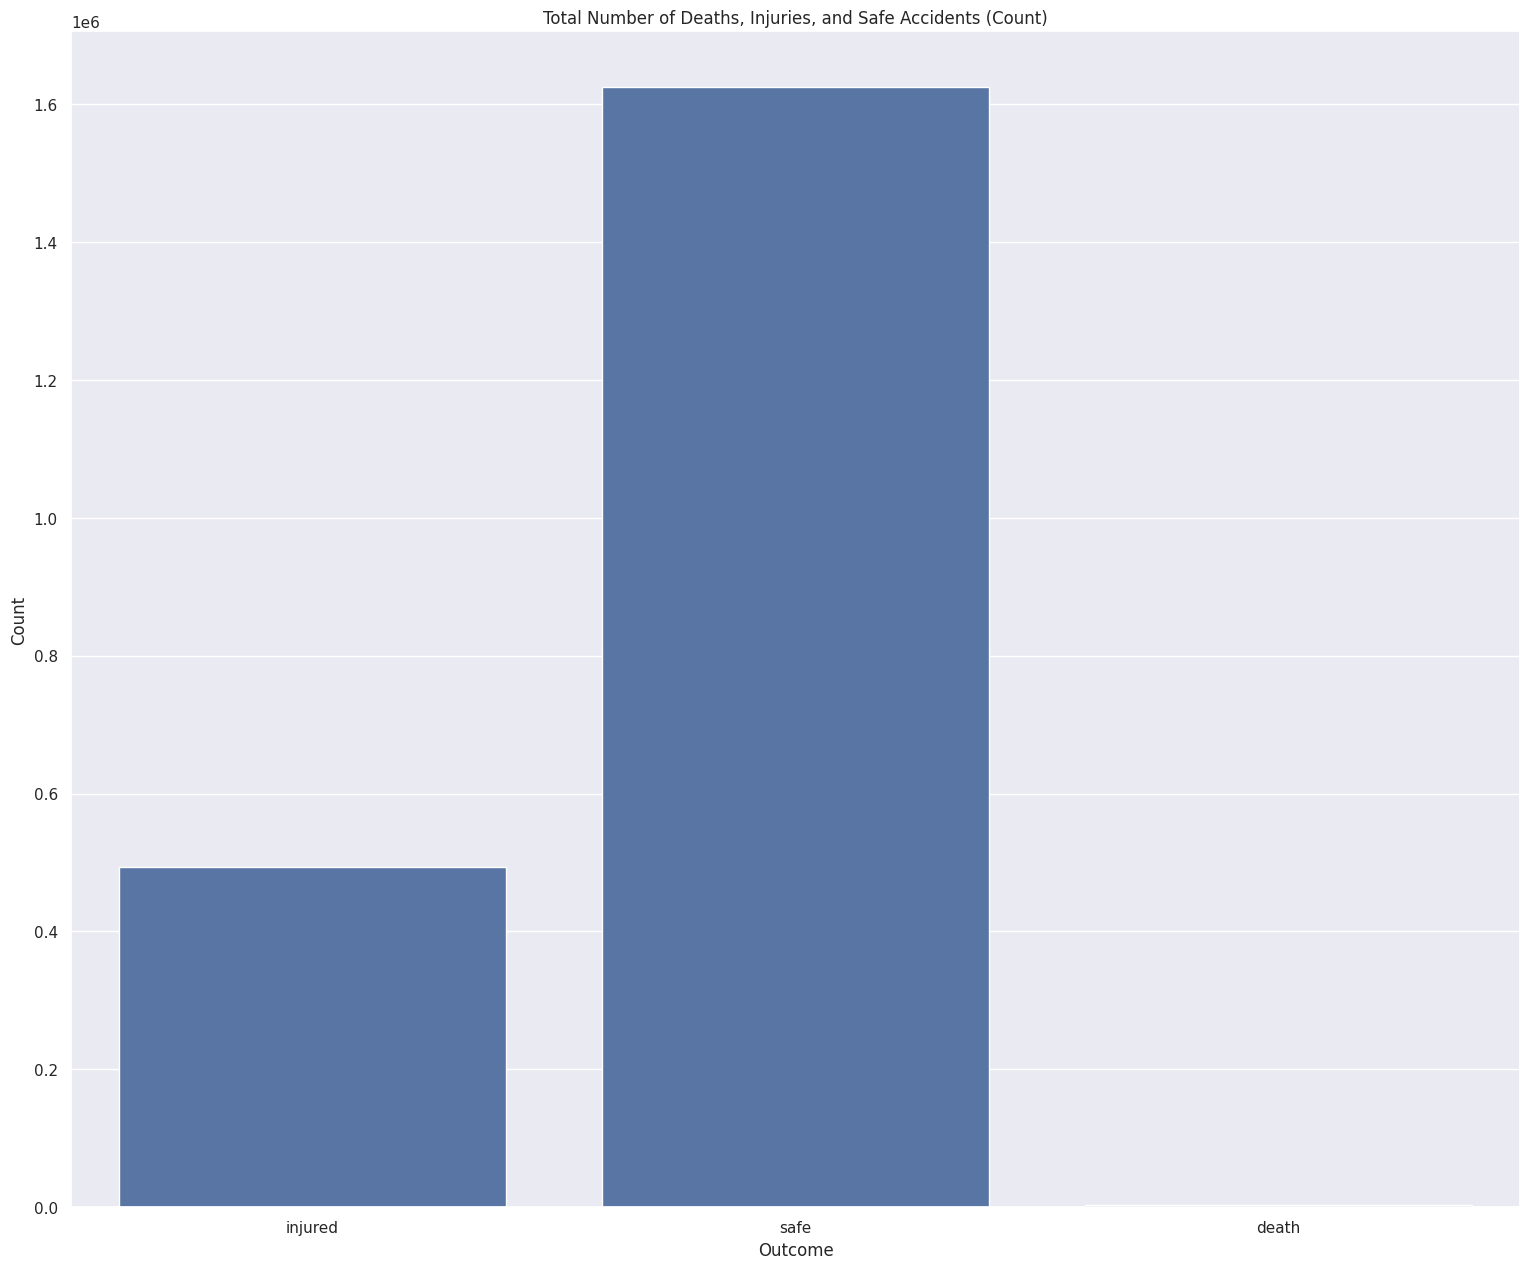

In [ ]:
# fill code here to display it by count
sns.countplot(x='outcome', data=crashes_subset).set(
    title='Total Number of Deaths, Injuries, and Safe Accidents (Count)',
    xlabel='Outcome',
    ylabel='Count'
)

[Text(0.5, 1.0, 'Total Number of Deaths, Injuries, and Safe Accidents (Percentage)'),
 Text(0.5, 0, 'Outcome'),
 Text(0, 0.5, 'Percentage')]

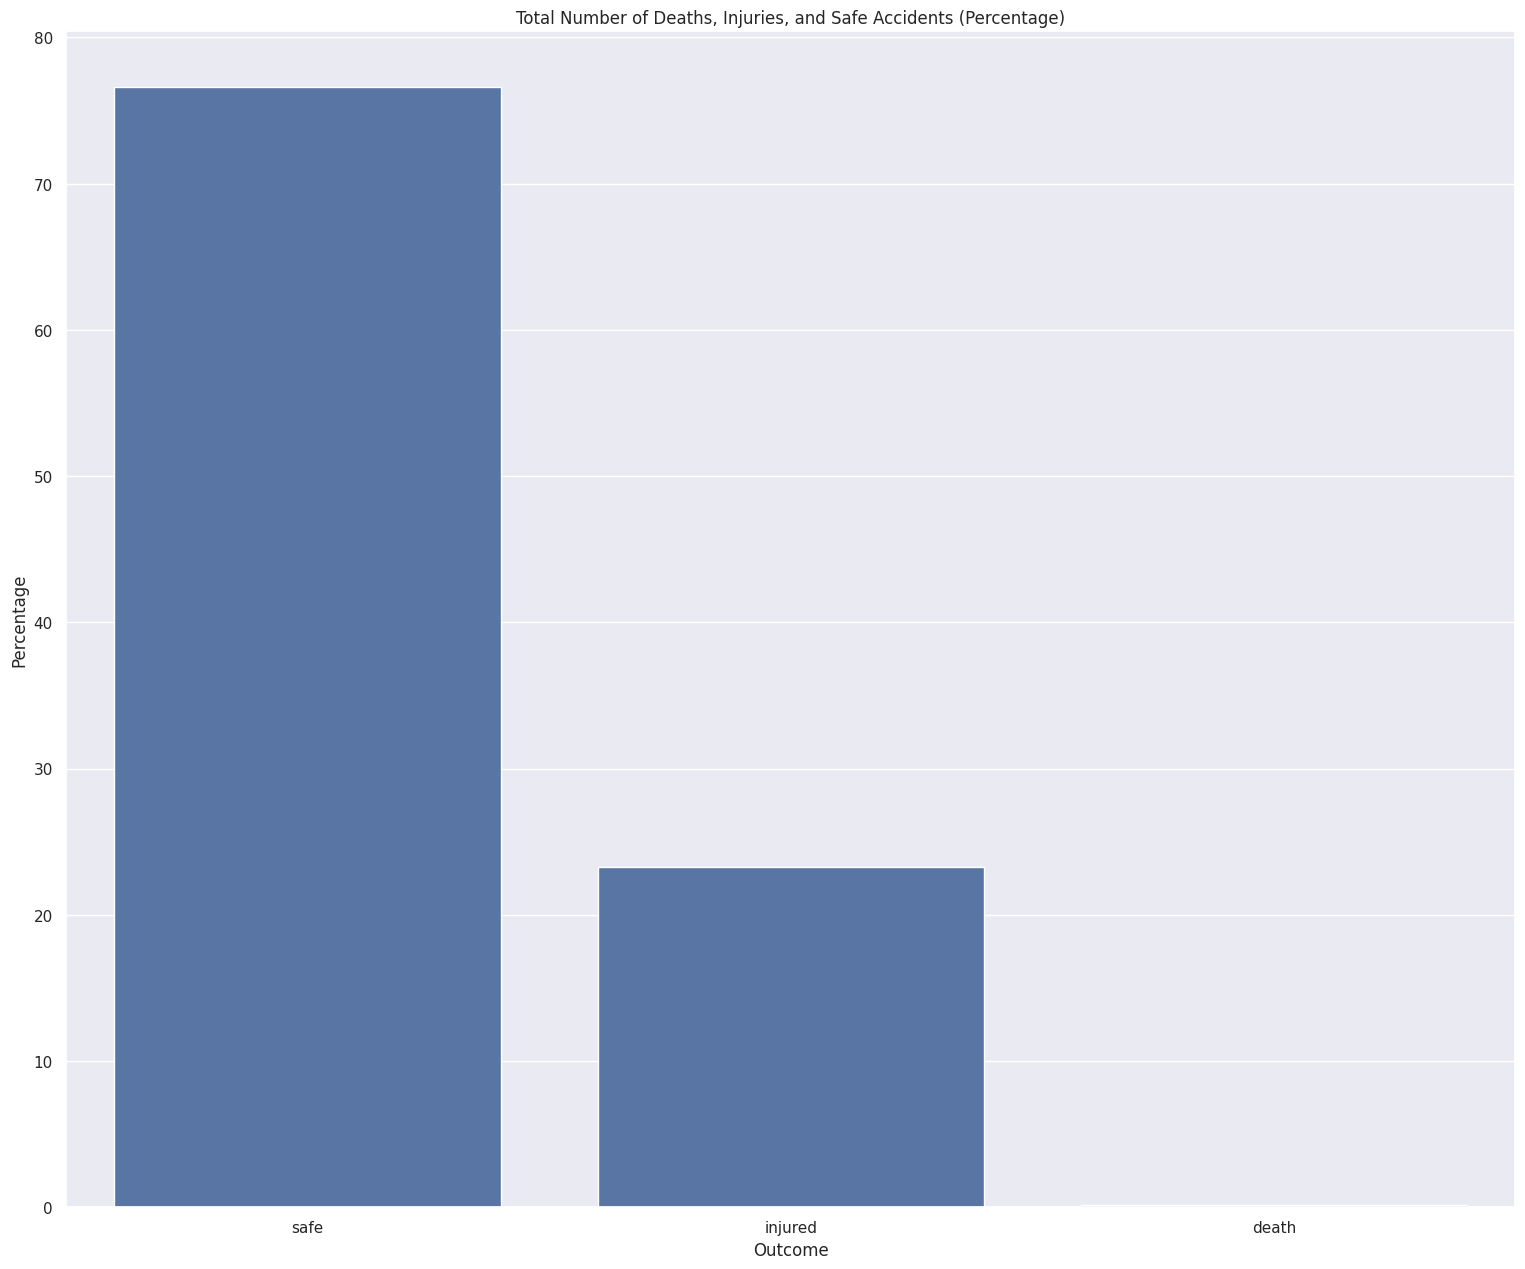

In [ ]:
# fill code here to display it by percent
outcome_percentage = crashes_subset['outcome'].value_counts(normalize=True) * 100
sns.barplot(x=outcome_percentage.index, y=outcome_percentage.values).set(
    title='Total Number of Deaths, Injuries, and Safe Accidents (Percentage)',
    xlabel='Outcome',
    ylabel='Percentage'
)

## Question 7b [1 point]

Lets see if there is a difference in percent of dead/safe/injured by the borough. Create a countplot that displays the percent of dead/safe/injured by borough

Hint: use the hue argument to countplot()

[Text(0.5, 1.0, 'Percent of Dead/Safe/Injured by Borough'),
 Text(0.5, 0, 'Borough'),
 Text(0, 0.5, 'Count')]

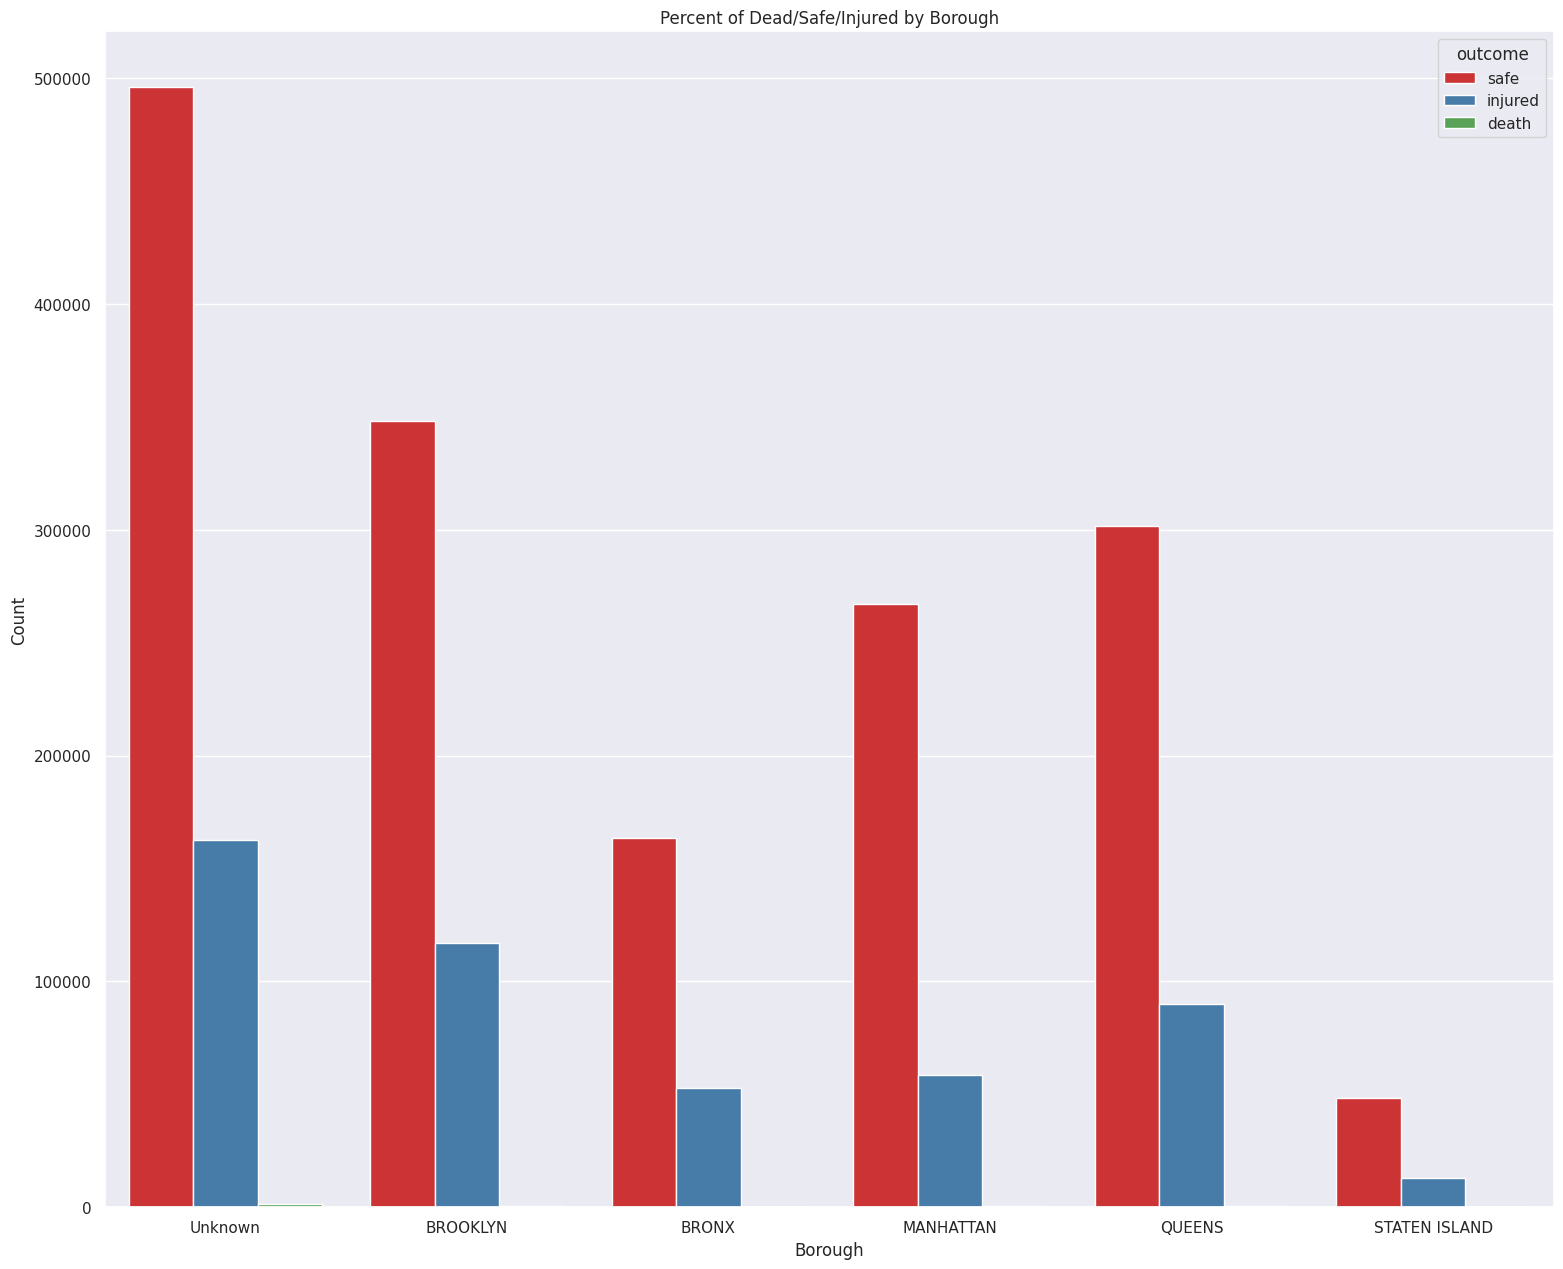

In [ ]:
# fill code here to display outcome by borough in terms of percent
sns.countplot(x='borough', hue='outcome', data=crashes_subset,
              hue_order=['safe', 'injured', 'death'],
              palette='Set1', dodge=True).set(
    title='Percent of Dead/Safe/Injured by Borough',
    xlabel='Borough',
    ylabel='Count'
)

## Question 8 [2 points]

Let us take a look at the time series of injuries and deaths. To do this, we will first need to aggregate the data to just the daily level, and then plot it.


In [ ]:
# group injury, death by crash_date
# fill code here
daily_data = crashes_subset.groupby('crash_date').agg({'injury': 'sum', 'death': 'sum'}).reset_index()

[Text(0.5, 1.0, 'Daily Injuries'),
 Text(0.5, 0, 'Crash Date'),
 Text(0, 0.5, 'Injuries')]

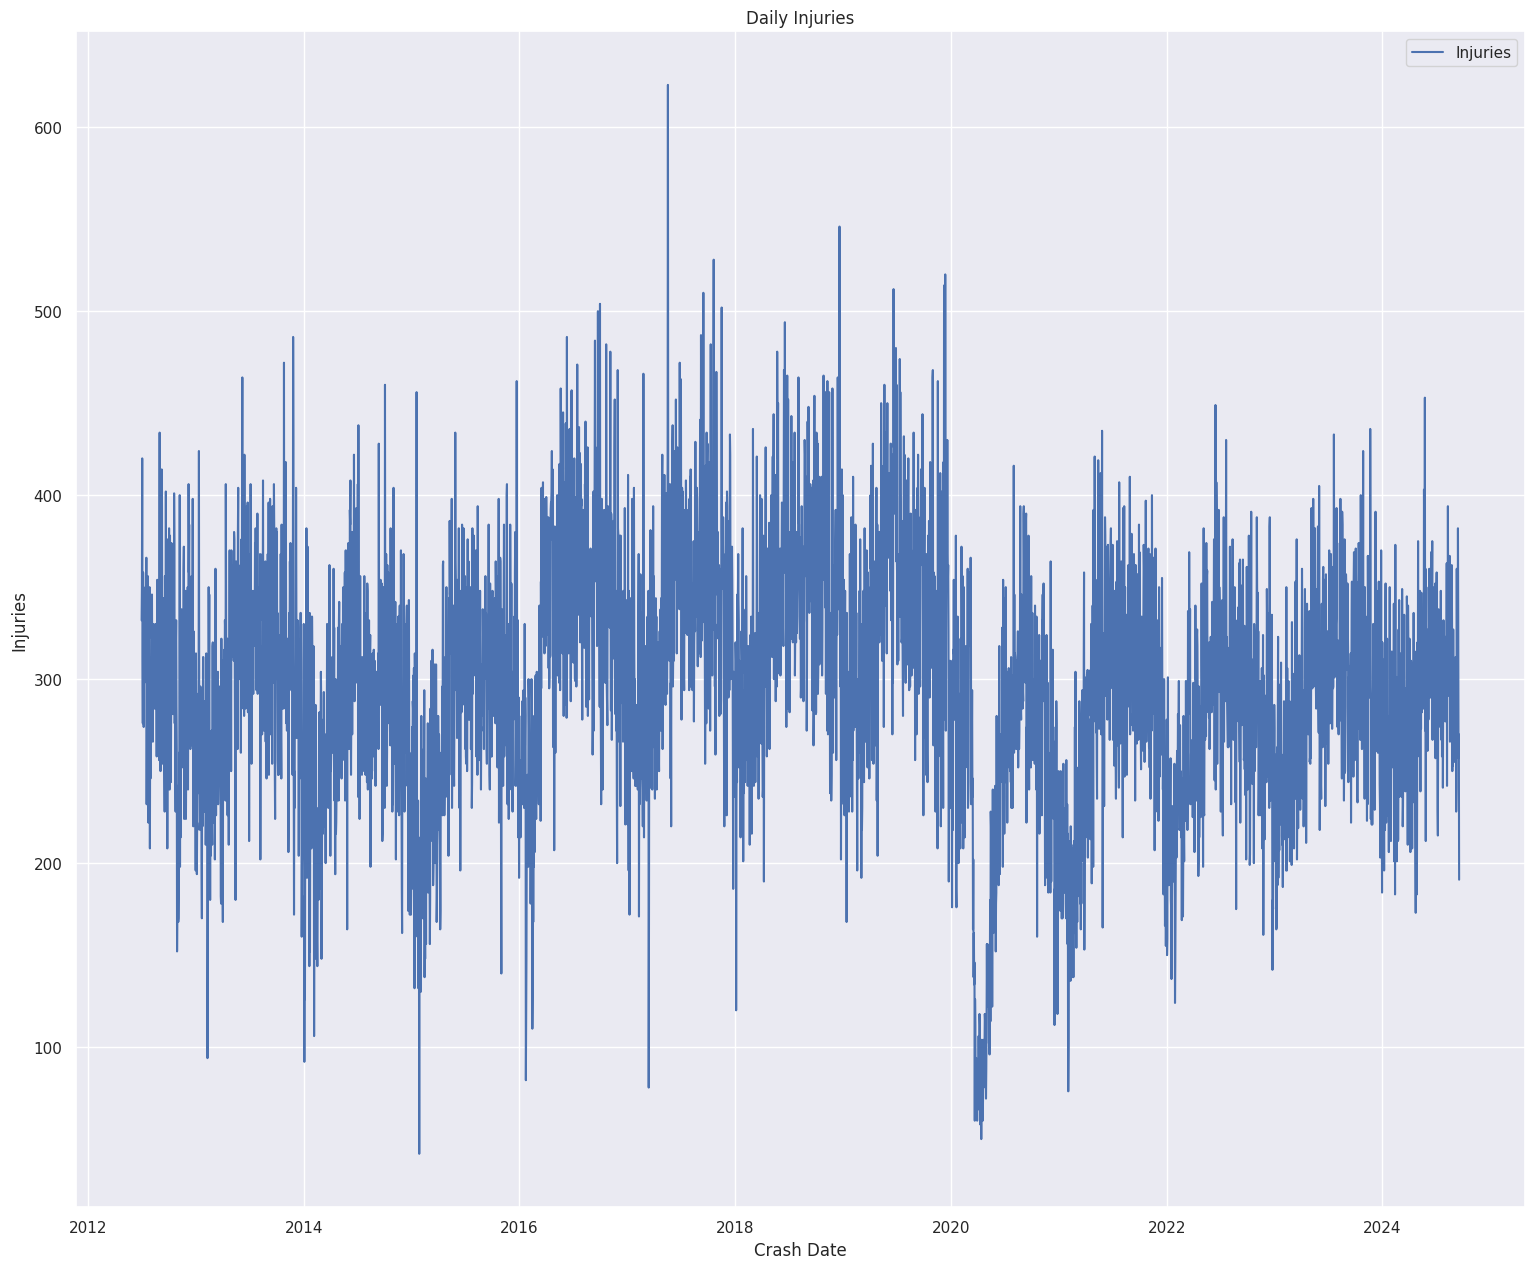

In [ ]:
# create a lineplot of injury by crash_date
# fill code here
sns.lineplot(x='crash_date', y='injury', data=daily_data, label='Injuries').set(
    title='Daily Injuries',
    xlabel='Crash Date',
    ylabel='Injuries'
)

[Text(0.5, 1.0, 'Daily Deaths'),
 Text(0.5, 0, 'Crash Date'),
 Text(0, 0.5, 'Deaths')]

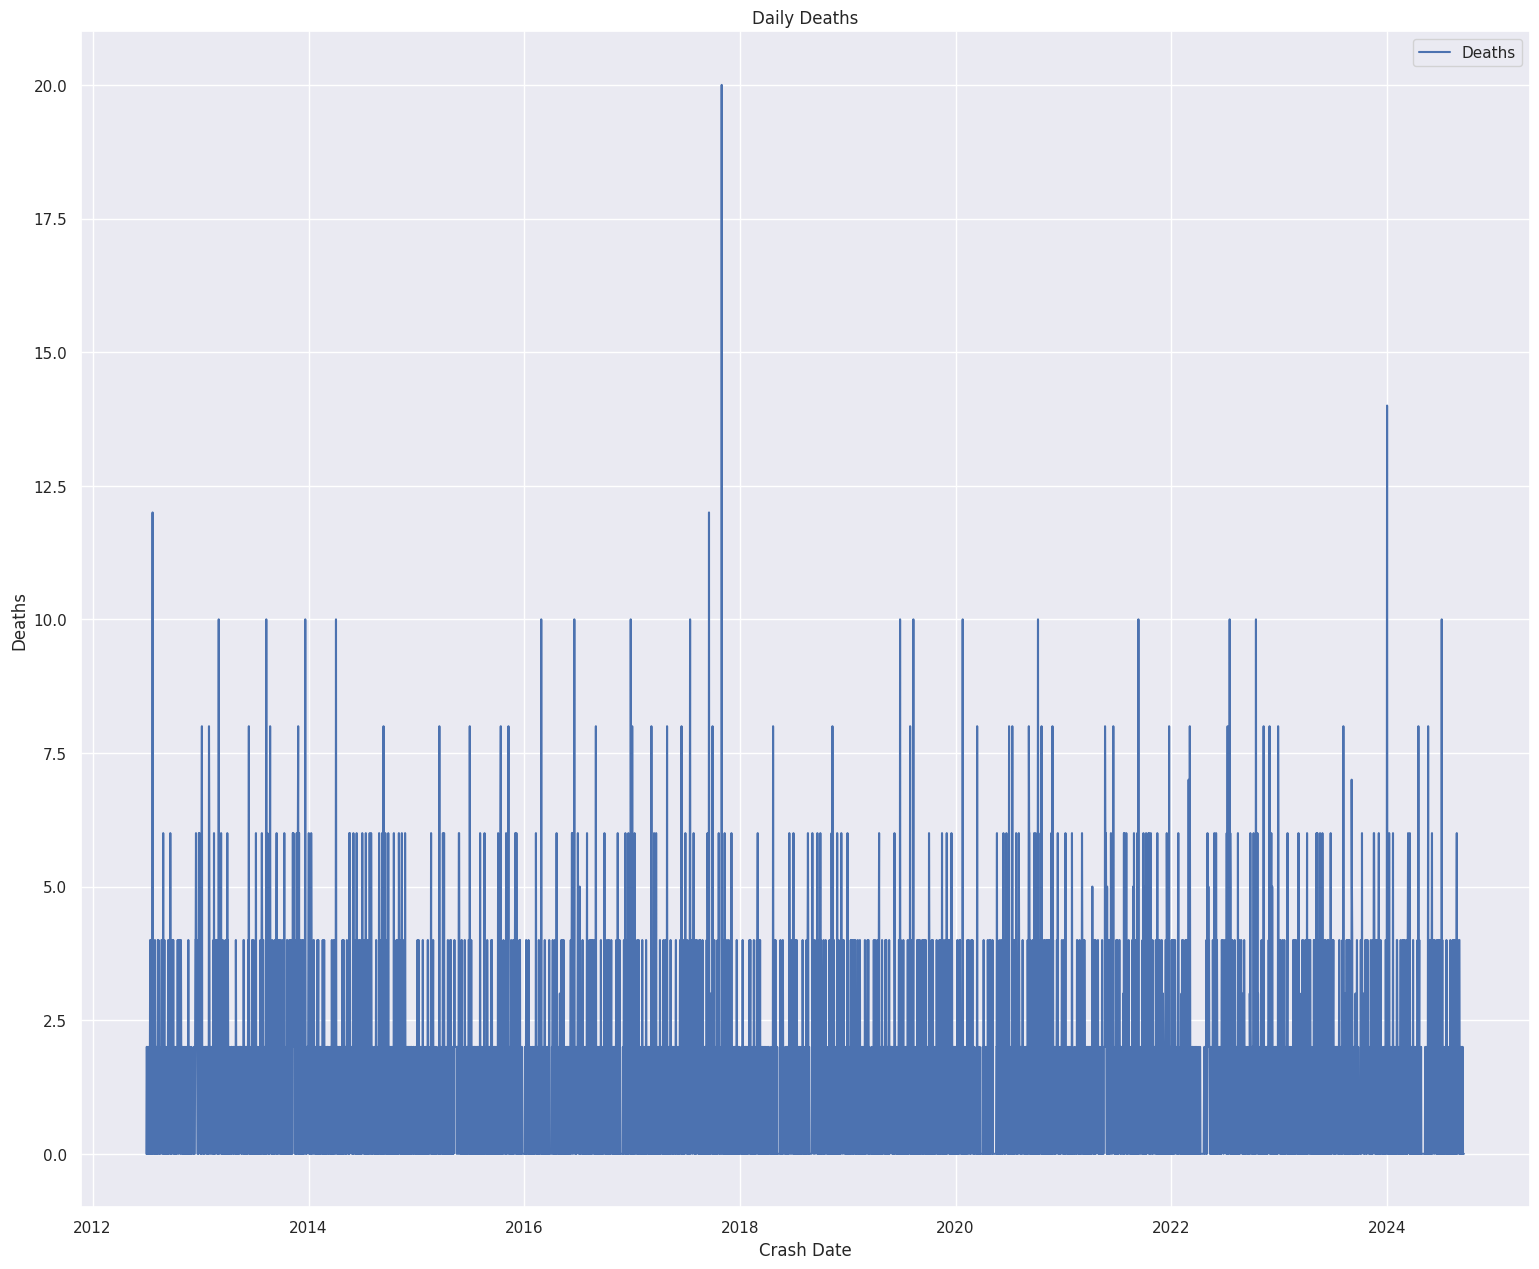

In [ ]:
# create a lineplot of death by crash_date
# fill code here
sns.lineplot(x='crash_date', y='death', data=daily_data, label='Deaths').set(
    title='Daily Deaths',
    xlabel='Crash Date',
    ylabel='Deaths'
)

## Question 9 [2 points]

This is a significantly long period of data, going back to 2012. Lets take a look at the more recent data, from 2018 onwards.

Replicate the charts in question 8 with data limited to 2018 onwards. Do you notice anything?

[Text(0.5, 1.0, 'Daily Injuries (2018 onwards)'),
 Text(0.5, 0, 'Crash Date'),
 Text(0, 0.5, 'Injuries')]

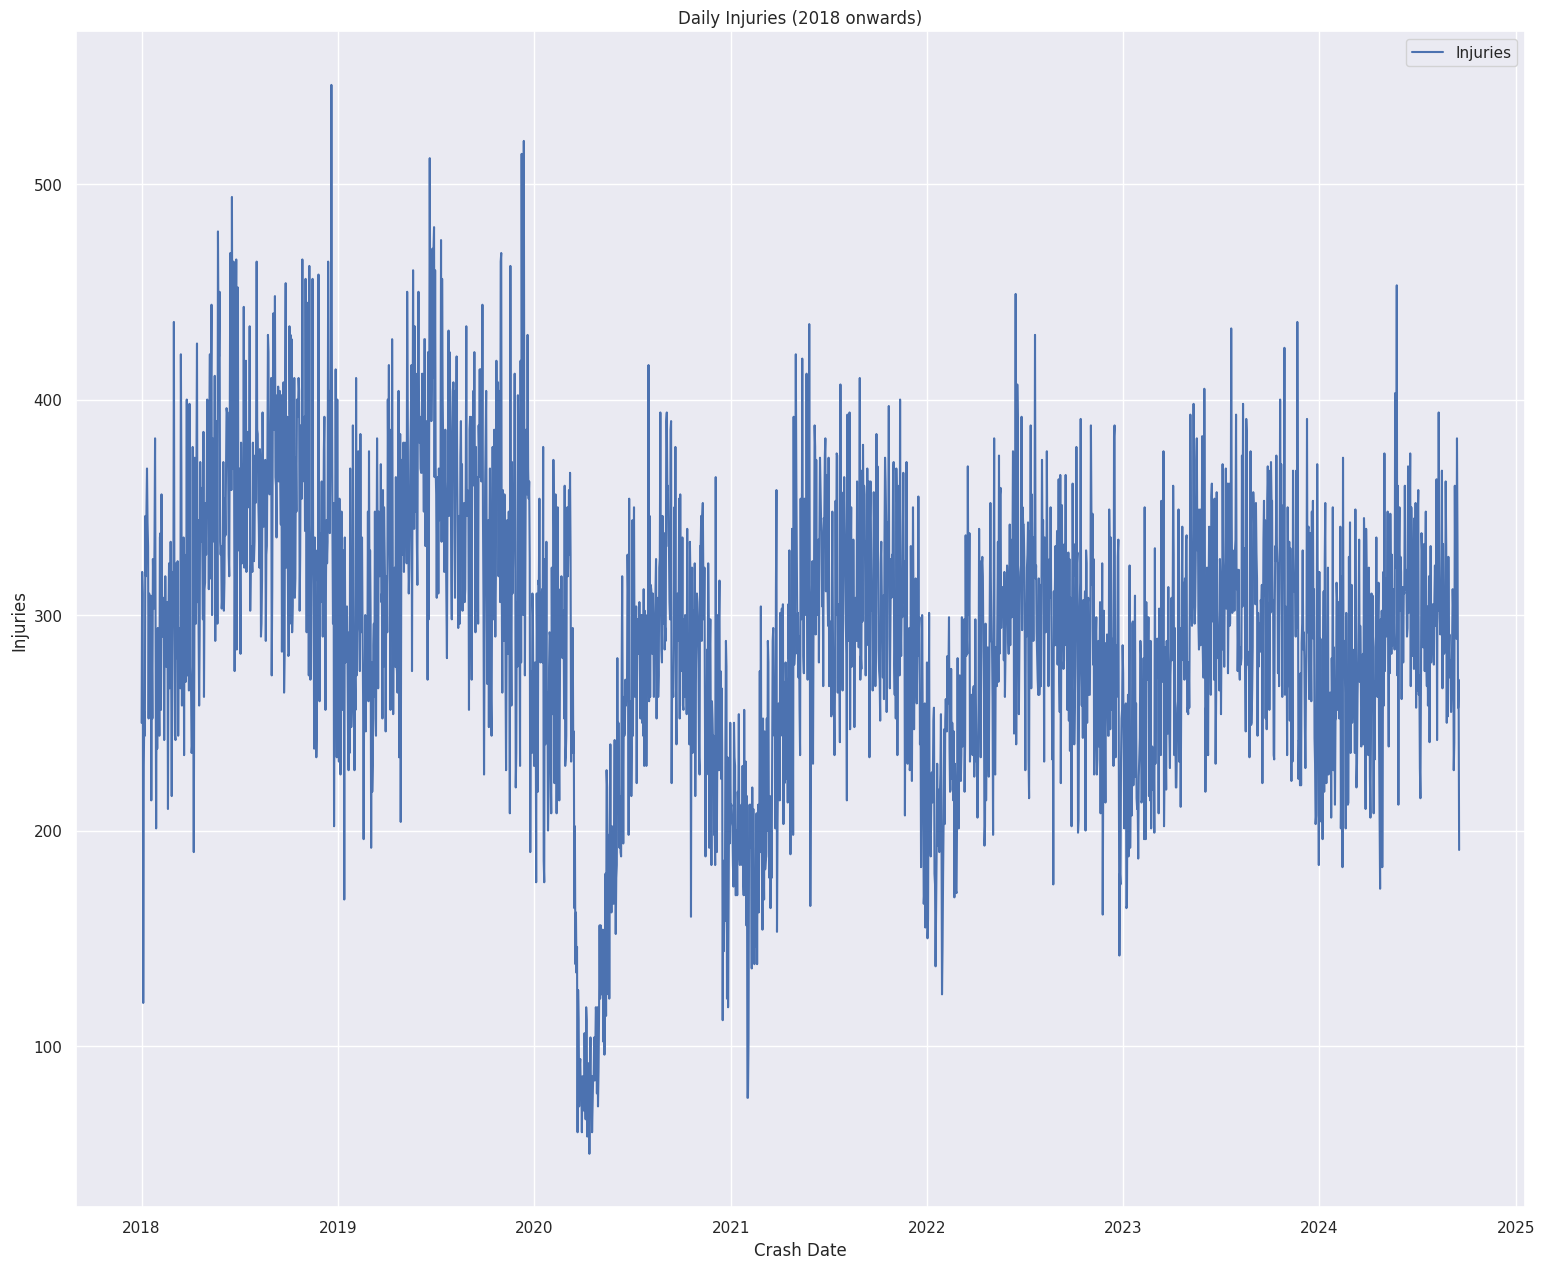

In [ ]:
# fill code here to lineplot injury by crash data after 2018
sns.lineplot(x='crash_date', y='injury', data=daily_data[daily_data['crash_date'] >= '2018-01-01'], label='Injuries').set(
    title='Daily Injuries (2018 onwards)',
    xlabel='Crash Date',
    ylabel='Injuries'
)

[Text(0.5, 1.0, 'Daily Deaths (2018 onwards)'),
 Text(0.5, 0, 'Crash Date'),
 Text(0, 0.5, 'Deaths')]

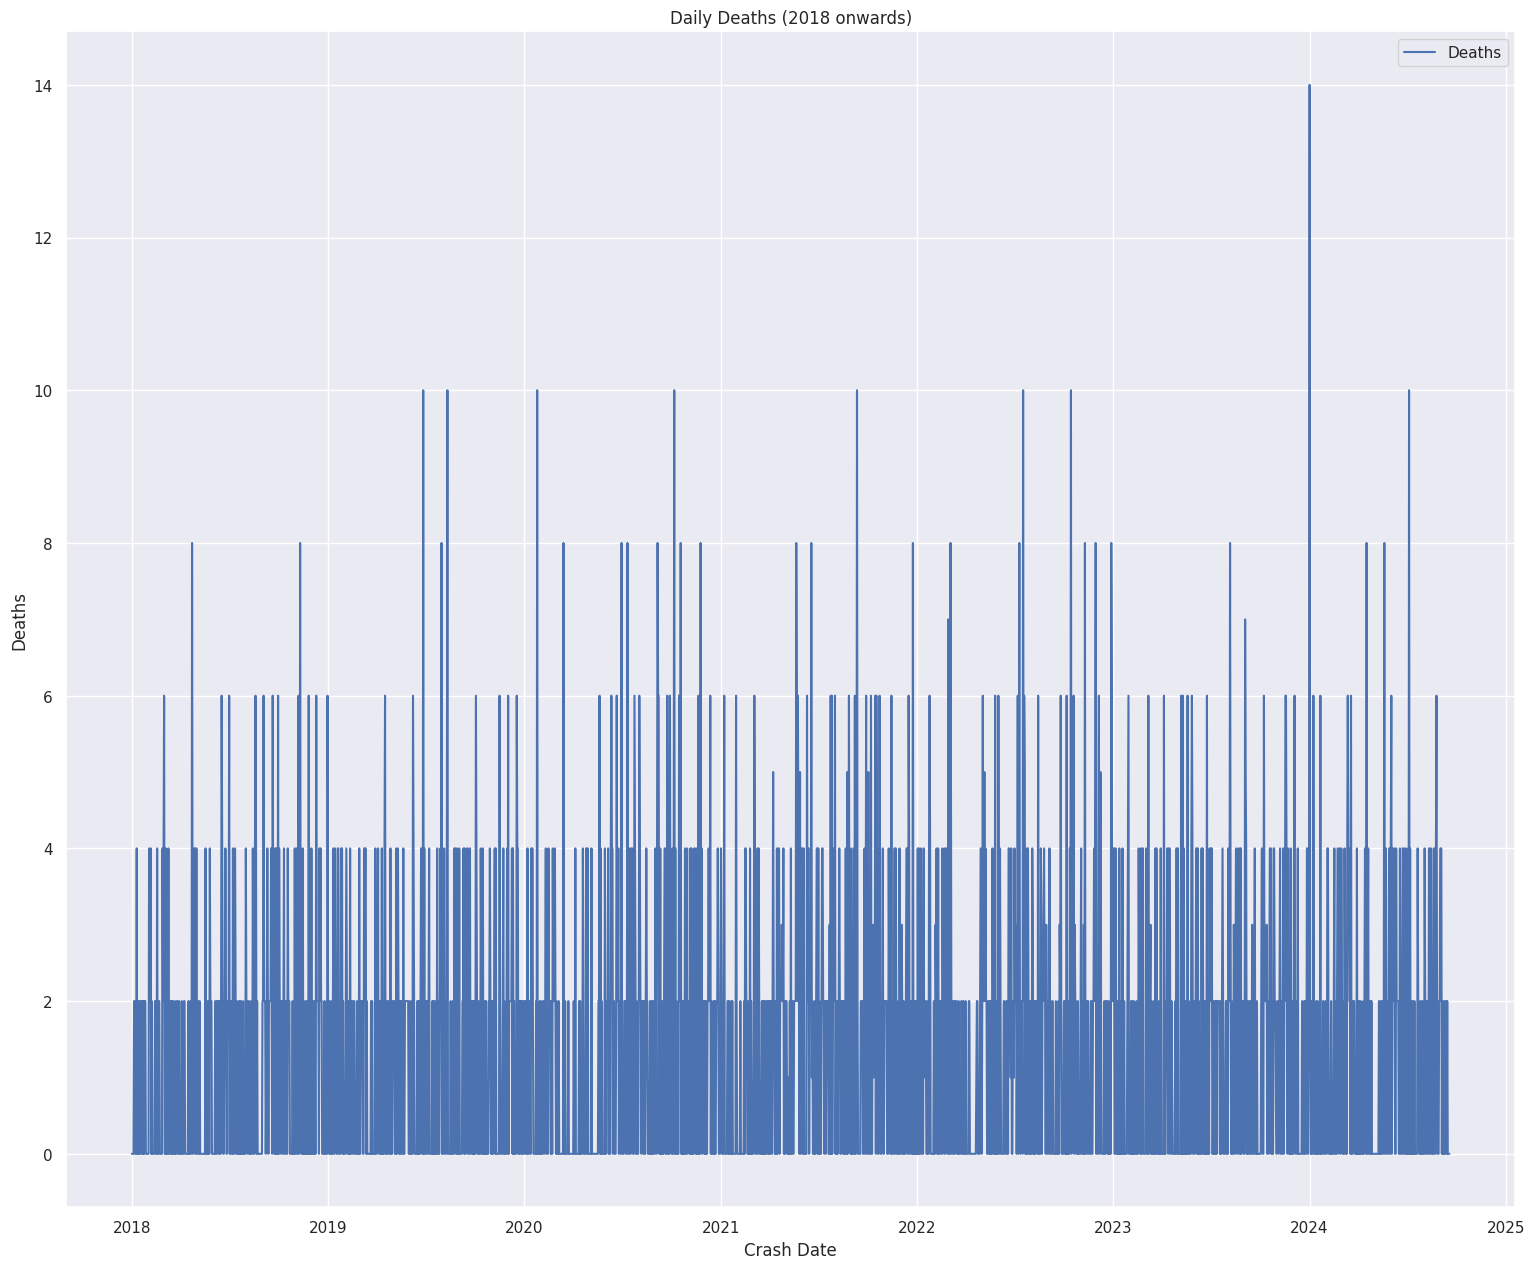

In [ ]:
# fill code here to lineplot death by crash data after 2018
sns.lineplot(x='crash_date', y='death', data=daily_data[daily_data['crash_date'] >= '2018-01-01'], label='Deaths').set(
    title='Daily Deaths (2018 onwards)',
    xlabel='Crash Date',
    ylabel='Deaths'
)

## Question 10 [3 points]

Write down three things you have noticed in this data. This could be based on the analysis we have already done, or some new analysis you can think of.

**Solution**



*   Death counts show relatively fewer fluctuations compared to injuries, suggesting fatal accidents may result from more severe conditions.
*   The injury data shows clearer seasonal peaks. Deaths, however, don’t follow such a clear seasonal trend.
*   Post-2018, death counts appear to stabilize, with fewer extreme spikes compared to the earlier years.





# Principal Component Analysis [20 points]


In this exercise, we will use our theoretical knowledge of PCA to code it using Pandas and numpy. Python provides a very convenient function to do PCA. However, we will not be using that function.

In this exercise, we will be using the [Wine](https://archive.ics.uci.edu/dataset/109/wine) dataset. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )

1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash  
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10)Color intensity  
11)Hue  
12)OD280/OD315 of diluted wines  
13)Proline   

The target variable is `class`.


In [ ]:
# # read in the dataset from the website.
# wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [ ]:
wine.head()

1  14.23  1.71  2.43  15.6  127   2.8  3.06  0.28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450

In [ ]:
wine.shape

(177, 14)

In [ ]:
# lets rename the columns to make the data more readable
wine.columns = ['class','alcohol','malic_acid','ash','alcalinity_of_ash',\
                'magnesium','total_phenols','flavanoids','nonflavanoid_phenols',\
                'proanthocyanins', 'color_intensity', 'hue', \
                '0D280_0D315_of_diluted_wines', 'proline']
wine.head()

class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    13.20        1.78  2.14               11.2        100   
1      1    13.16        2.36  2.67               18.6        101   
2      1    14.37        1.95  2.50               16.8        113   
3      1    13.24        2.59  2.87               21.0        118   
4      1    14.20        1.76  2.45               15.2        112   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   color_intensity   hue  0D280_0D315_of_diluted_wines  proline  
0             4.38  1.05                          3.40     1050  
1             5.68  1.03                          3.17     1185  
2             7.80  0.86                          3.45     1480  
3             4.32  1.04                          2.93      735  
4             6.75  1.05                          2.85     1450

In [ ]:
wine.dtypes

class                             int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
0D280_0D315_of_diluted_wines    float64
proline                           int64
dtype: object

This is a well posed classification problem. The task is usually to predict which region a wine comes from, based on its chemical analysis. In this analysis, our focus will not be on prediction, but on identifying the relationships between predictor variables, of which there are 13.

## Question 1 [2 points]

**Describe and visualize the data.**

Calculate the summary statistics for the 13 predictor variables, and create a pairplot of the 13 predictor variables, by class.

Hint: https://seaborn.pydata.org/examples/scatterplot_matrix.html

This will take while to run, since you are trying to visualize 13 pairs of scatterplots.

In [99]:
# fill code here to describe the dataset
summary_stats = wine.describe()
summary_stats

class     alcohol  malic_acid         ash  alcalinity_of_ash  \
count  177.000000  177.000000  177.000000  177.000000         177.000000   
mean     1.943503   12.993672    2.339887    2.366158          19.516949   
std      0.773991    0.808808    1.119314    0.275080           3.336071   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.360000    1.600000    2.210000          17.200000   
50%      2.000000   13.050000    1.870000    2.360000          19.500000   
75%      3.000000   13.670000    3.100000    2.560000          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  177.000000     177.000000  177.000000            177.000000   
mean    99.587571       2.292260    2.023446              0.362316   
std     14.174018       0.626465    0.998658              0.124653   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.740000    1.200000              0.270000   
50%     98.000000       2.350000    2.130000              0.340000   
75%    107.000000       2.800000    2.860000              0.440000   
max    162.000000       3.880000    5.080000              0.660000   

       proanthocyanins  color_intensity         hue  \
count       177.000000       177.000000  177.000000   
mean          1.586949         5.054802    0.956983   
std           0.571545         2.324446    0.229135   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.210000    0.780000   
50%           1.550000         4.680000    0.960000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       0D280_0D315_of_diluted_wines      proline  
count                    177.000000   177.000000  
mean                       2.604294   745.096045  
std                        0.705103   314.884046  
min                        1.270000   278.000000  
25%                        1.930000   500.000000  
50%                        2.780000   672.000000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

Do you notice anything about the scale of the variables? Are they all on the same scale?

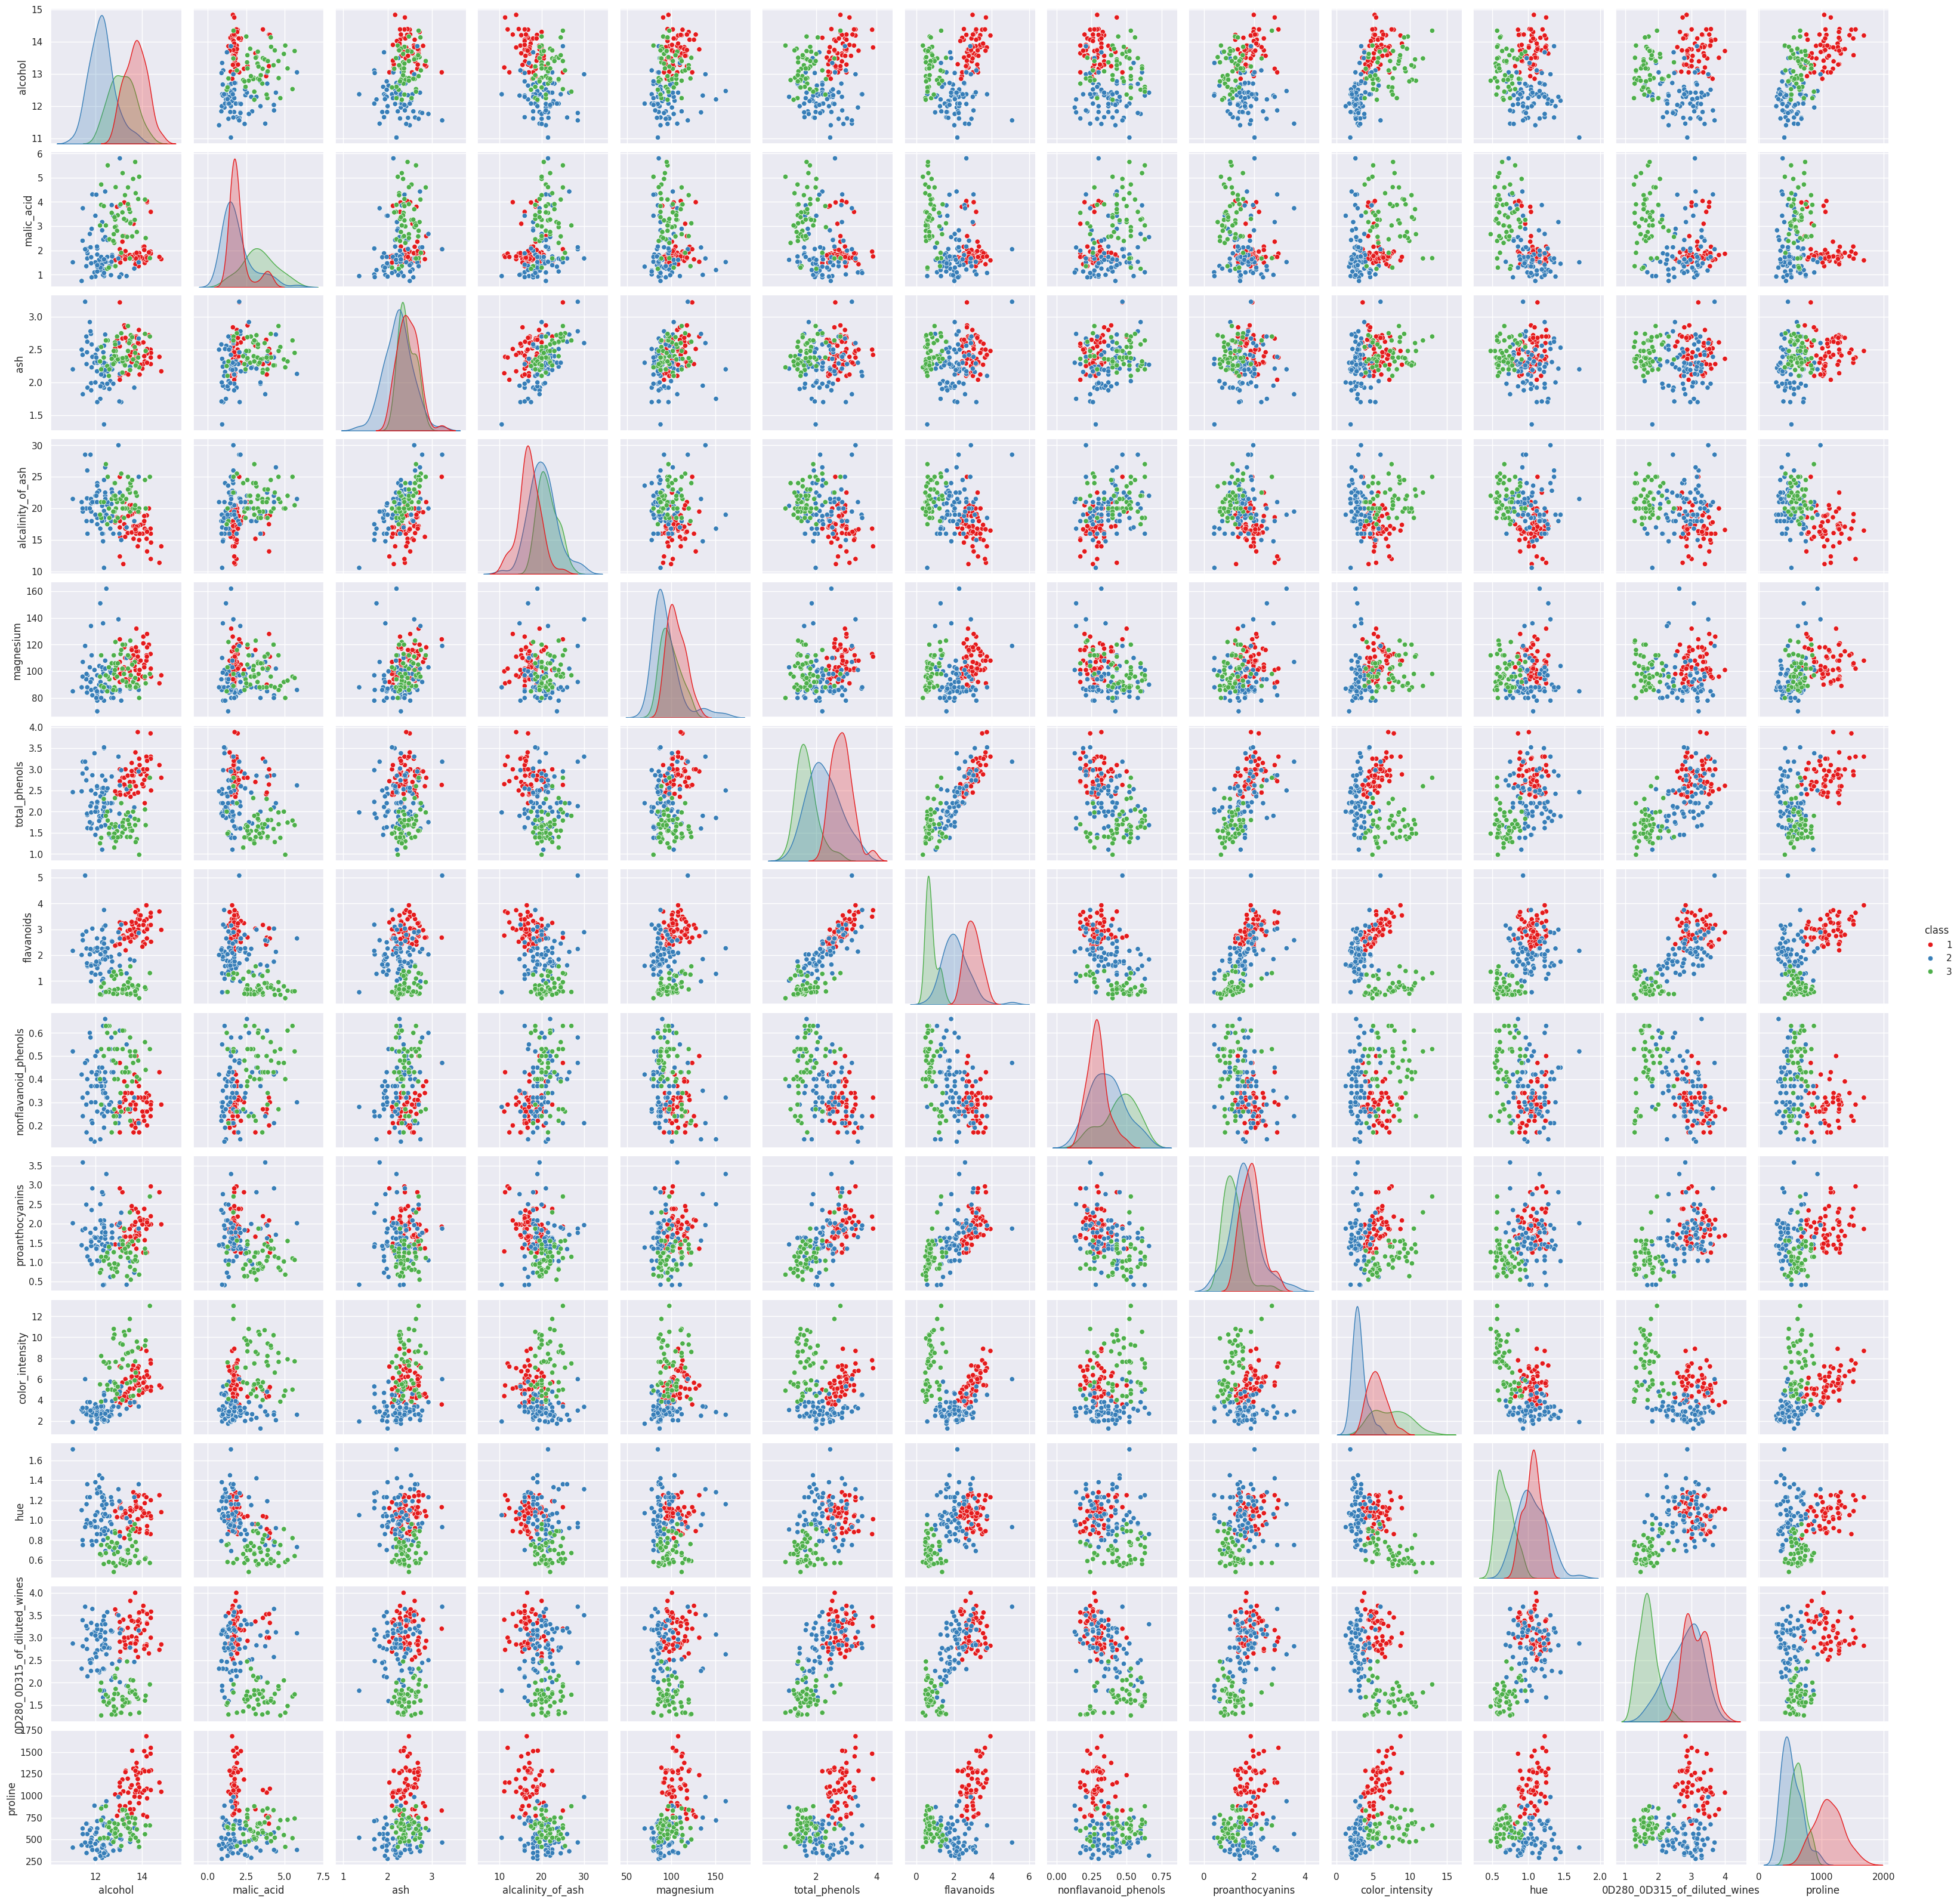

In [100]:
# fill code here to create a pairplot of the 13 predictor variables, set hue to
# class

sns.pairplot(wine, hue='class', palette='Set1')


## Question 2 [3 points]

As you can see, it is hard to derive much information from this chart, since there is so many charts here.

An easier way to look at the relationships between the variables would be to look at their correlations.

Let us calculate the covariance matrix for these variables, which we can then turn into the correlation matrix


Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Covariance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

If we standardize the data first by subtracting off the mean, we will be able to get rid of the $\bar x$ terms, and be able to simplify these two equations.

Let $z$ the be mean subtracted data. Then:

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(z_{ij})(z_{ik})$

Covariance matrix: $Σ = \frac{1}{n-1}((Z)^T(Z))$


In [101]:
# now lets follow the steps to implement this.
# lets first create a pandas dataframe with only X variables.. This should be
# all variables in your wine dataset,except the class
X = wine.drop('class', axis=1)


# Next lets subtract the mean of each column from that column
# fill code here
Z = X - X.mean()


In [102]:
# This shows that the mean is 0, but the standard deviation is still not on the
# same scale.
np.round(Z.describe(), 4)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
count  177.0000    177.0000  177.0000           177.0000   177.0000   
mean    -0.0000      0.0000   -0.0000            -0.0000    -0.0000   
std      0.8088      1.1193    0.2751             3.3361    14.1740   
min     -1.9637     -1.5999   -1.0062            -8.9169   -29.5876   
25%     -0.6337     -0.7399   -0.1562            -2.3169   -11.5876   
50%      0.0563     -0.4699   -0.0062            -0.0169    -1.5876   
75%      0.6763      0.7601    0.1938             1.9831     7.4124   
max      1.8363      3.4601    0.8638            10.4831    62.4124   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       177.0000    177.0000              177.0000         177.0000   
mean         -0.0000      0.0000               -0.0000          -0.0000   
std           0.6265      0.9987                0.1247           0.5715   
min          -1.3123     -1.6834               -0.2323          -1.1769   
25%          -0.5523     -0.8234               -0.0923          -0.3369   
50%           0.0577      0.1066               -0.0223          -0.0369   
75%           0.5077      0.8366                0.0777           0.3631   
max           1.5877      3.0566                0.2977           1.9931   

       color_intensity       hue  0D280_0D315_of_diluted_wines  proline  
count         177.0000  177.0000                      177.0000  177.000  
mean            0.0000    0.0000                        0.0000    0.000  
std             2.3244    0.2291                        0.7051  314.884  
min            -3.7748   -0.4770                       -1.3343 -467.096  
25%            -1.8448   -0.1770                       -0.6743 -245.096  
50%            -0.3748    0.0030                        0.1757  -73.096  
75%             1.1452    0.1630                        0.5657  239.904  
max             7.9452    0.7530                        1.3957  934.904

<Axes: xlabel='alcohol', ylabel='proline'>

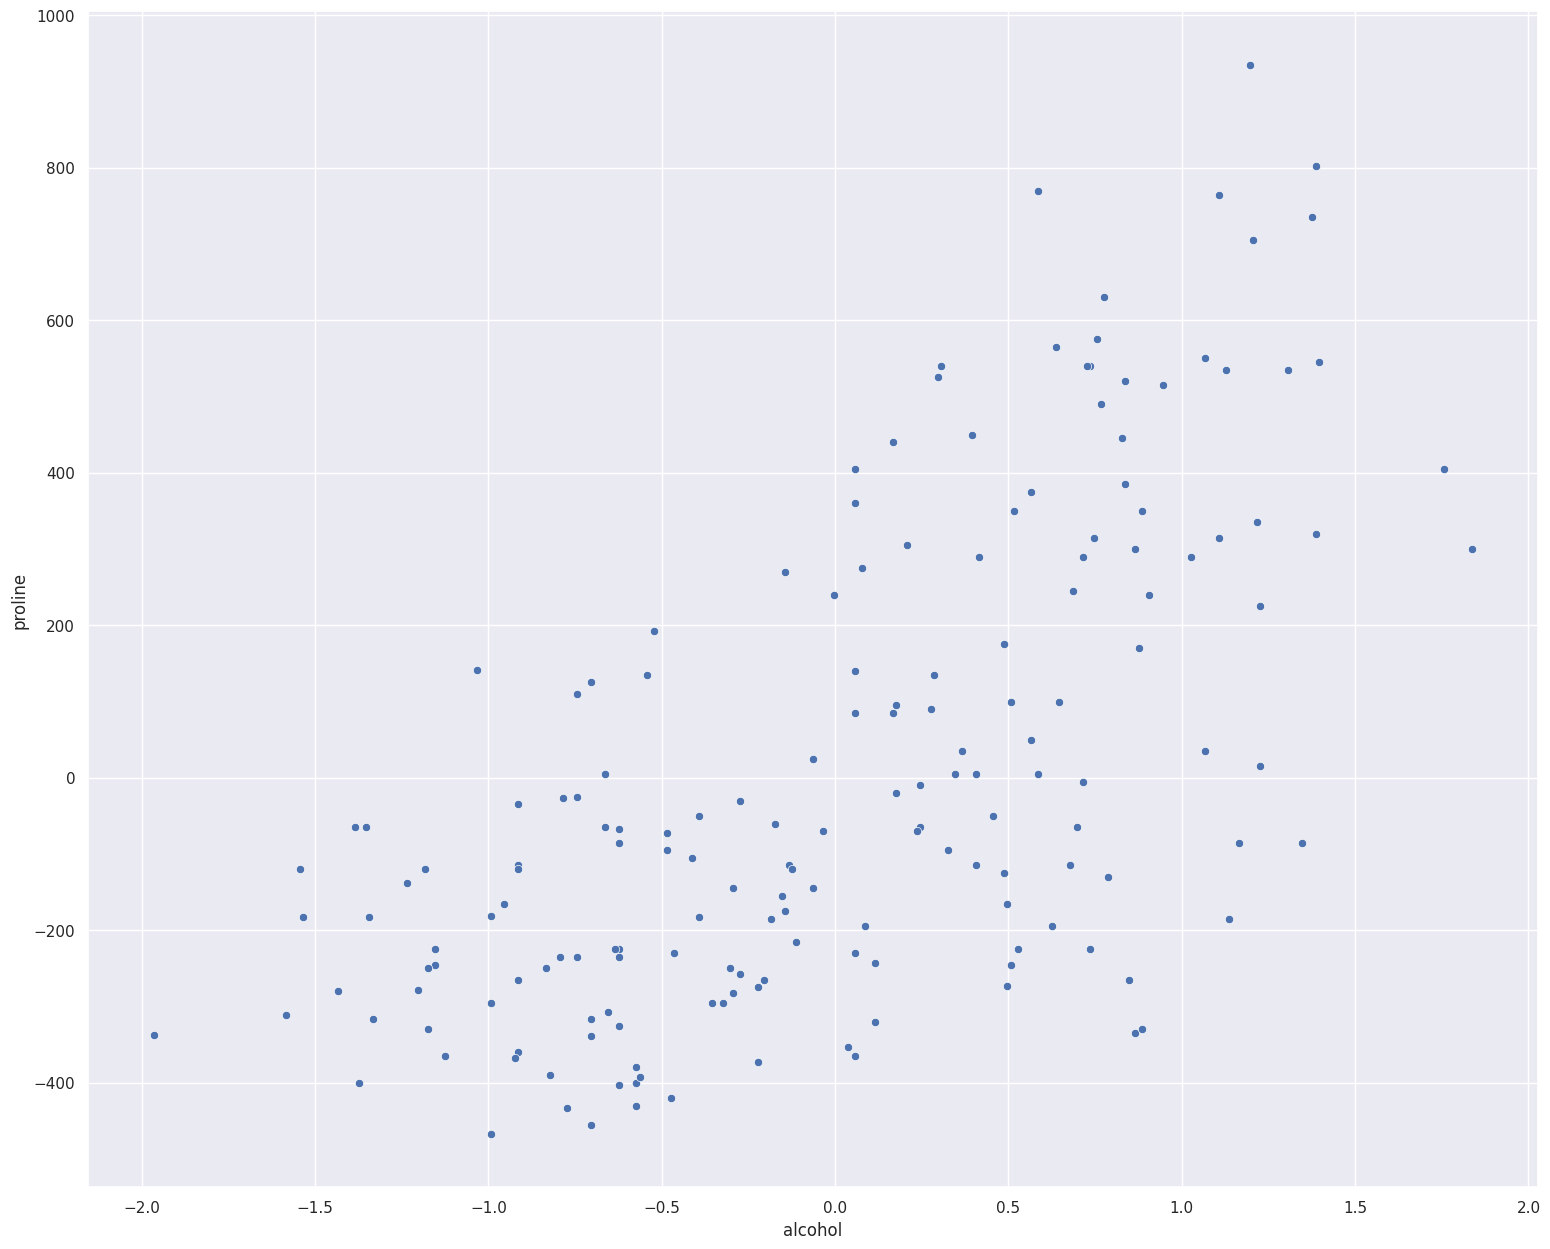

In [103]:
# IF you look at the chart, you will see that proline while still centered
# around zero, has large variations, as compared to alcohol, for example
# we will ignore this problem for now, and come back to it
sns.scatterplot(Z, x='alcohol', y='proline')

In [104]:
# Lets convert this dataset to a numpy array
# fill code here
Z_np = Z.to_numpy()

In [105]:
def covariance_manual(Z: np.array, sample_size: int) -> np.array:
  """Calculates the covariance matrix
  functions
  Args:
    Z: np.array containing the data with mean 0
    sample_size: int describing how large the sample is
  Returns:
    Covariance matrix of Z
  """
  # fill code here
  return (1 / (sample_size - 1)) * np.dot(Z.T, Z)

In [106]:
# calling the function above to give us a matrix of covariances
covariance_matrix = covariance_manual(Z_np, len(wine))
covariance_matrix

array([[    0.6541711 ,     0.09049758,     0.04693692,    -0.81851146,
            2.96623909,     0.14417518,     0.18588386,    -0.01526878,
            0.05896752,     1.03003738,    -0.01396897,     0.03274437,
          163.26765665],
       [    0.09049758,     1.25286476,     0.0507899 ,     1.06850761,
           -0.77817187,    -0.23386224,    -0.45754734,     0.04067185,
           -0.13944694,     0.65058464,    -0.14384455,    -0.28942678,
          -66.79419363],
       [    0.04693692,     0.0507899 ,     0.07566925,     0.40992912,
            1.11942925,     0.02208828,     0.03134002,     0.00642429,
            0.0012706 ,     0.16537878,    -0.0047387 ,     0.00029159,
           19.31412108],
       [   -0.81851146,     1.06850761,     0.40992912,    11.12937018,
           -3.39069723,    -0.66372602,    -1.15580306,     0.14945483,
           -0.3637605 ,     0.15879883,    -0.20846903,    -0.63084592,
         -458.90845532],
       [    2.96623909,    -0.778171

In [107]:
# The numbers here are not easy to read, so lets convert to pandas
# and look at it. You can also see the outsized proline numbers here
pd.DataFrame(covariance_matrix, columns = X.columns, index=X.columns)

alcohol  malic_acid        ash  \
alcohol                         0.654171    0.090498   0.046937   
malic_acid                      0.090498    1.252865   0.050790   
ash                             0.046937    0.050790   0.075669   
alcalinity_of_ash              -0.818511    1.068508   0.409929   
magnesium                       2.966239   -0.778172   1.119429   
total_phenols                   0.144175   -0.233862   0.022088   
flavanoids                      0.185884   -0.457547   0.031340   
nonflavanoid_phenols           -0.015269    0.040672   0.006424   
proanthocyanins                 0.058968   -0.139447   0.001271   
color_intensity                 1.030037    0.650585   0.165379   
hue                            -0.013969   -0.143845  -0.004739   
0D280_0D315_of_diluted_wines    0.032744   -0.289427   0.000292   
proline                       163.267657  -66.794194  19.314121   

                              alcalinity_of_ash    magnesium  total_phenols  \
alcohol                               -0.818511     2.966239       0.144175   
malic_acid                             1.068508    -0.778172      -0.233862   
ash                                    0.409929     1.119429       0.022088   
alcalinity_of_ash                     11.129370    -3.390697      -0.663726   
magnesium                             -3.390697   200.902799       1.848721   
total_phenols                         -0.663726     1.848721       0.392459   
flavanoids                            -1.155803     2.648418       0.540568   
nonflavanoid_phenols                   0.149455    -0.445403      -0.035008   
proanthocyanins                       -0.363760     1.834928       0.218603   
color_intensity                        0.158799     6.567503      -0.082131   
hue                                   -0.208469     0.169021       0.062153   
0D280_0D315_of_diluted_wines          -0.630846     0.469338       0.309014   
proline                             -458.908455  1729.664837      97.811145   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.185884             -0.015269   
malic_acid                     -0.457547              0.040672   
ash                             0.031340              0.006424   
alcalinity_of_ash              -1.155803              0.149455   
magnesium                       2.648418             -0.445403   
total_phenols                   0.540568             -0.035008   
flavanoids                      0.997317             -0.066765   
nonflavanoid_phenols           -0.066765              0.015538   
proanthocyanins                 0.371150             -0.025881   
color_intensity                -0.404864              0.040621   
hue                             0.124301             -0.007475   
0D280_0D315_of_diluted_wines    0.553729             -0.044110   
proline                       154.457224            -12.124144   

                              proanthocyanins  color_intensity        hue  \
alcohol                              0.058968         1.030037  -0.013969   
malic_acid                          -0.139447         0.650585  -0.143845   
ash                                  0.001271         0.165379  -0.004739   
alcalinity_of_ash                   -0.363760         0.158799  -0.208469   
magnesium                            1.834928         6.567503   0.169021   
total_phenols                        0.218603        -0.082131   0.062153   
flavanoids                           0.371150        -0.404864   0.124301   
nonflavanoid_phenols                -0.025881         0.040621  -0.007475   
proanthocyanins                      0.326663        -0.036019   0.038554   
color_intensity                     -0.036019         5.403051  -0.278351   
hue                                  0.038554        -0.278351   0.052503   
0D280_0D315_of_diluted_wines         0.206905        -0.714173   0.091671   
proline                             58.621999       231.02095

In [108]:
# Check: compare this with the inbuilt function, the numbers should match!
X.cov()

alcohol  malic_acid        ash  \
alcohol                         0.654171    0.090498   0.046937   
malic_acid                      0.090498    1.252865   0.050790   
ash                             0.046937    0.050790   0.075669   
alcalinity_of_ash              -0.818511    1.068508   0.409929   
magnesium                       2.966239   -0.778172   1.119429   
total_phenols                   0.144175   -0.233862   0.022088   
flavanoids                      0.185884   -0.457547   0.031340   
nonflavanoid_phenols           -0.015269    0.040672   0.006424   
proanthocyanins                 0.058968   -0.139447   0.001271   
color_intensity                 1.030037    0.650585   0.165379   
hue                            -0.013969   -0.143845  -0.004739   
0D280_0D315_of_diluted_wines    0.032744   -0.289427   0.000292   
proline                       163.267657  -66.794194  19.314121   

                              alcalinity_of_ash    magnesium  total_phenols  \
alcohol                               -0.818511     2.966239       0.144175   
malic_acid                             1.068508    -0.778172      -0.233862   
ash                                    0.409929     1.119429       0.022088   
alcalinity_of_ash                     11.129370    -3.390697      -0.663726   
magnesium                             -3.390697   200.902799       1.848721   
total_phenols                         -0.663726     1.848721       0.392459   
flavanoids                            -1.155803     2.648418       0.540568   
nonflavanoid_phenols                   0.149455    -0.445403      -0.035008   
proanthocyanins                       -0.363760     1.834928       0.218603   
color_intensity                        0.158799     6.567503      -0.082131   
hue                                   -0.208469     0.169021       0.062153   
0D280_0D315_of_diluted_wines          -0.630846     0.469338       0.309014   
proline                             -458.908455  1729.664837      97.811145   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.185884             -0.015269   
malic_acid                     -0.457547              0.040672   
ash                             0.031340              0.006424   
alcalinity_of_ash              -1.155803              0.149455   
magnesium                       2.648418             -0.445403   
total_phenols                   0.540568             -0.035008   
flavanoids                      0.997317             -0.066765   
nonflavanoid_phenols           -0.066765              0.015538   
proanthocyanins                 0.371150             -0.025881   
color_intensity                -0.404864              0.040621   
hue                             0.124301             -0.007475   
0D280_0D315_of_diluted_wines    0.553729             -0.044110   
proline                       154.457224            -12.124144   

                              proanthocyanins  color_intensity        hue  \
alcohol                              0.058968         1.030037  -0.013969   
malic_acid                          -0.139447         0.650585  -0.143845   
ash                                  0.001271         0.165379  -0.004739   
alcalinity_of_ash                   -0.363760         0.158799  -0.208469   
magnesium                            1.834928         6.567503   0.169021   
total_phenols                        0.218603        -0.082131   0.062153   
flavanoids                           0.371150        -0.404864   0.124301   
nonflavanoid_phenols                -0.025881         0.040621  -0.007475   
proanthocyanins                      0.326663        -0.036019   0.038554   
color_intensity                     -0.036019         5.403051  -0.278351   
hue                                  0.038554        -0.278351   0.052503   
0D280_0D315_of_diluted_wines         0.206905        -0.714173   0.091671   
proline                             58.621999       231.02095

## Question 3 [2 points]

The covariance matrix is a good start, but it does not help us with interpretation. This is where the correlation matrix comes into play. By dividing by the standard deviation, it standardizes things, and makes the comparable.

Now that we have the covariance matrix, how do we get to the correlation matrix which is much more informative?

Remember that, to get from the covariance to the correlation, we divide by the standard deviation of each variable. What if we standardize our dataset so that each variable has a standard deviation of 1 (Standardization)?

Then the covariance matrix will just give us the correlation matrix directly!


In [109]:
# lets write code to make this a reality.
# Remember that Z was your dataframe with mean subtracted.
# lets create a new dataframe where each variable is divided by its standard deviation
#fill code here
Z_standardized = Z / Z.std()

In [110]:
# Lets take a look at this new data
np.round(Z_standardized.describe(), 4)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
count  177.0000    177.0000  177.0000           177.0000   177.0000   
mean    -0.0000      0.0000   -0.0000            -0.0000    -0.0000   
std      1.0000      1.0000    1.0000             1.0000     1.0000   
min     -2.4279     -1.4293   -3.6577            -2.6729    -2.0875   
25%     -0.7835     -0.6610   -0.5677            -0.6945    -0.8175   
50%      0.0696     -0.4198   -0.0224            -0.0051    -0.1120   
75%      0.8362      0.6791    0.7047             0.5944     0.5230   
max      2.2704      3.0913    3.1403             3.1423     4.4033   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       177.0000    177.0000              177.0000         177.0000   
mean         -0.0000      0.0000               -0.0000          -0.0000   
std           1.0000      1.0000                1.0000           1.0000   
min          -2.0947     -1.6857               -1.8637          -2.0592   
25%          -0.8815     -0.8246               -0.7406          -0.5895   
50%           0.0922      0.1067               -0.1790          -0.0646   
75%           0.8105      0.8377                0.6232           0.6352   
max           2.5344      3.0607                2.3881           3.4871   

       color_intensity       hue  0D280_0D315_of_diluted_wines   proline  
count         177.0000  177.0000                      177.0000  177.0000  
mean            0.0000    0.0000                        0.0000    0.0000  
std             1.0000    1.0000                        1.0000    1.0000  
min            -1.6240   -2.0817                       -1.8923   -1.4834  
25%            -0.7937   -0.7724                       -0.9563   -0.7784  
50%            -0.1612    0.0132                        0.2492   -0.2321  
75%             0.4927    0.7114                        0.8023    0.7619  
max             3.4181    3.2863                        1.9794    2.9690

<Axes: xlabel='alcohol', ylabel='proline'>

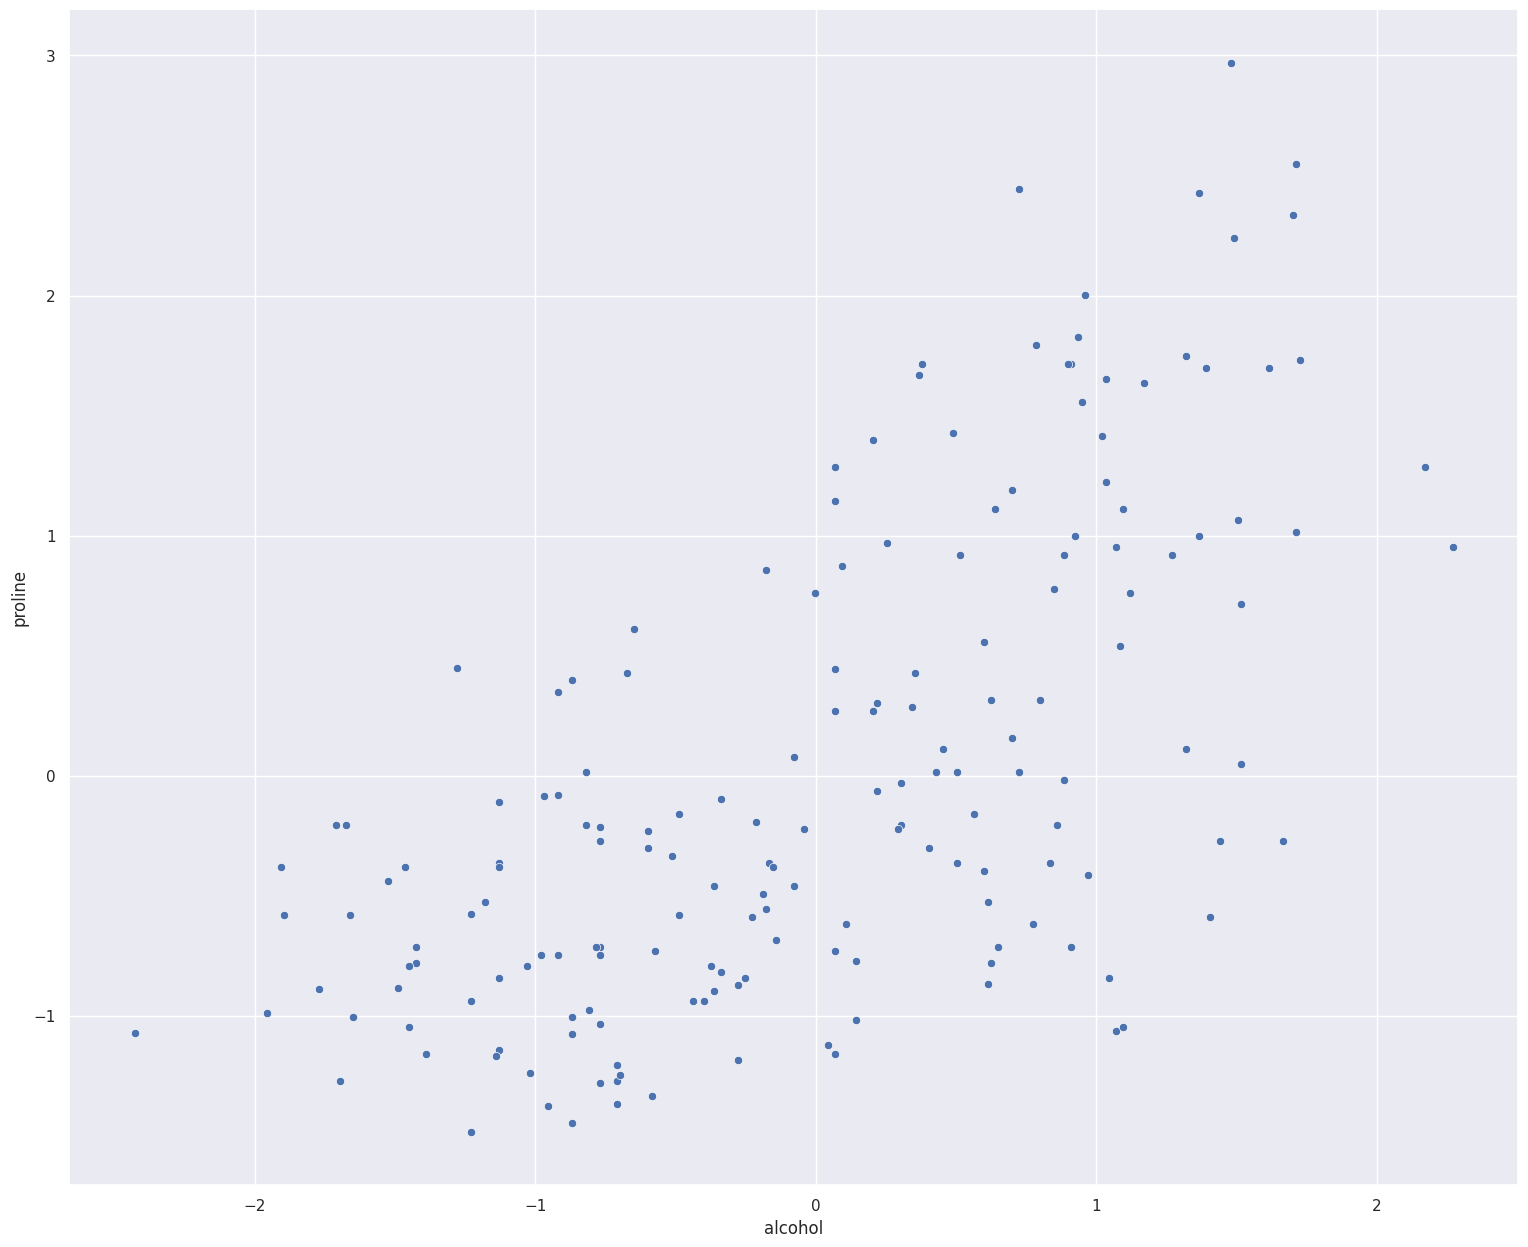

In [111]:
# now these look to be on the same scale!
sns.scatterplot(Z_standardized, x='alcohol', y='proline')

In [112]:
# lets call the covariance_manual function, only this time it will return the
# correlation matrix!

# fill code here
P = covariance_manual(Z_standardized.to_numpy(), len(wine))

In [113]:
# let us make this numpy matrix cleaner to look at
pd.DataFrame(P, columns = X.columns, index=X.columns)

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.099963  0.210964   
malic_acid                    0.099963    1.000000  0.164955   
ash                           0.210964    0.164955  1.000000   
alcalinity_of_ash            -0.303350    0.286148  0.446698   
magnesium                     0.258742   -0.049049  0.287107   
total_phenols                 0.284543   -0.333512  0.128176   
flavanoids                    0.230133   -0.409324  0.114084   
nonflavanoid_phenols         -0.151445    0.291501  0.187354   
proanthocyanins               0.127561   -0.217975  0.008082   
color_intensity               0.547883    0.250053  0.258643   
hue                          -0.075375   -0.560854 -0.075181   
0D280_0D315_of_diluted_wines  0.057417   -0.366720  0.001503   
proline                       0.641068   -0.189512  0.222979   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.303350   0.258742       0.284543   
malic_acid                             0.286148  -0.049049      -0.333512   
ash                                    0.446698   0.287107       0.128176   
alcalinity_of_ash                      1.000000  -0.071707      -0.317583   
magnesium                             -0.071707   1.000000       0.208200   
total_phenols                         -0.317583   0.208200       1.000000   
flavanoids                            -0.346922   0.187101       0.864046   
nonflavanoid_phenols                   0.359395  -0.252091      -0.448301   
proanthocyanins                       -0.190779   0.226504       0.610533   
color_intensity                        0.020478   0.199337      -0.056401   
hue                                   -0.272719   0.052042       0.432987   
0D280_0D315_of_diluted_wines          -0.268186   0.046961       0.699566   
proline                               -0.436858   0.387542       0.495839   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.230133             -0.151445   
malic_acid                     -0.409324              0.291501   
ash                             0.114084              0.187354   
alcalinity_of_ash              -0.346922              0.359395   
magnesium                       0.187101             -0.252091   
total_phenols                   0.864046             -0.448301   
flavanoids                      1.000000             -0.536326   
nonflavanoid_phenols           -0.536326              1.000000   
proanthocyanins                 0.650254             -0.363268   
color_intensity                -0.174411              0.140192   
hue                             0.543208             -0.261709   
0D280_0D315_of_diluted_wines    0.786372             -0.501859   
proline                         0.491180             -0.308886   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.127561         0.547883 -0.075375   
malic_acid                          -0.217975         0.250053 -0.560854   
ash                                  0.008082         0.258643 -0.075181   
alcalinity_of_ash                   -0.190779         0.020478 -0.272719   
magnesium                            0.226504         0.199337  0.052042   
total_phenols                        0.610533        -0.056401  0.432987   
flavanoids                           0.650254        -0.174411  0.543208   
nonflavanoid_phenols                -0.363268         0.140192 -0.261709   
proanthocyanins                      1.000000        -0.027112  0.294397   
color_intensity                     -0.027112         1.000000 -0.522615   
hue                                  0.294397        -0.522615  1.000000   
0D280_0D315_of_diluted_wines         0.513415        -0.435744  0.567395   
proline                              0.325731         0.315632  0.234879   

                              0D280_0D315_of_diluted_wines   prol

In [114]:
# Check: compare this with the inbuilt function corr().
# You should have the same results
wine.drop('class', axis=1).corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.099963  0.210964   
malic_acid                    0.099963    1.000000  0.164955   
ash                           0.210964    0.164955  1.000000   
alcalinity_of_ash            -0.303350    0.286148  0.446698   
magnesium                     0.258742   -0.049049  0.287107   
total_phenols                 0.284543   -0.333512  0.128176   
flavanoids                    0.230133   -0.409324  0.114084   
nonflavanoid_phenols         -0.151445    0.291501  0.187354   
proanthocyanins               0.127561   -0.217975  0.008082   
color_intensity               0.547883    0.250053  0.258643   
hue                          -0.075375   -0.560854 -0.075181   
0D280_0D315_of_diluted_wines  0.057417   -0.366720  0.001503   
proline                       0.641068   -0.189512  0.222979   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.303350   0.258742       0.284543   
malic_acid                             0.286148  -0.049049      -0.333512   
ash                                    0.446698   0.287107       0.128176   
alcalinity_of_ash                      1.000000  -0.071707      -0.317583   
magnesium                             -0.071707   1.000000       0.208200   
total_phenols                         -0.317583   0.208200       1.000000   
flavanoids                            -0.346922   0.187101       0.864046   
nonflavanoid_phenols                   0.359395  -0.252091      -0.448301   
proanthocyanins                       -0.190779   0.226504       0.610533   
color_intensity                        0.020478   0.199337      -0.056401   
hue                                   -0.272719   0.052042       0.432987   
0D280_0D315_of_diluted_wines          -0.268186   0.046961       0.699566   
proline                               -0.436858   0.387542       0.495839   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.230133             -0.151445   
malic_acid                     -0.409324              0.291501   
ash                             0.114084              0.187354   
alcalinity_of_ash              -0.346922              0.359395   
magnesium                       0.187101             -0.252091   
total_phenols                   0.864046             -0.448301   
flavanoids                      1.000000             -0.536326   
nonflavanoid_phenols           -0.536326              1.000000   
proanthocyanins                 0.650254             -0.363268   
color_intensity                -0.174411              0.140192   
hue                             0.543208             -0.261709   
0D280_0D315_of_diluted_wines    0.786372             -0.501859   
proline                         0.491180             -0.308886   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.127561         0.547883 -0.075375   
malic_acid                          -0.217975         0.250053 -0.560854   
ash                                  0.008082         0.258643 -0.075181   
alcalinity_of_ash                   -0.190779         0.020478 -0.272719   
magnesium                            0.226504         0.199337  0.052042   
total_phenols                        0.610533        -0.056401  0.432987   
flavanoids                           0.650254        -0.174411  0.543208   
nonflavanoid_phenols                -0.363268         0.140192 -0.261709   
proanthocyanins                      1.000000        -0.027112  0.294397   
color_intensity                     -0.027112         1.000000 -0.522615   
hue                                  0.294397        -0.522615  1.000000   
0D280_0D315_of_diluted_wines         0.513415        -0.435744  0.567395   
proline                              0.325731         0.315632  0.234879   

                              0D280_0D315_of_diluted_wines   prol

## Question 4 [3 points]

Now we are ready to proceed with PCA. We have the covariance matrix of the standardized data that we just calculated above. We will do eigen decomposition of that covariance matrix in this question.

Eigendecomposition of the covariance matrix:  $\Sigma = W\wedge W^{-1}$.

The eigenvectors (principal components) are sorted in descending order based on their corresponding eigenvalues. The eigenvector with the largest eigenvalue captures the most variance, and so on.
You can select the top $k$ eigenvectors based on the highest eigenvalues to reduce the dimensionality while preserving as much variance as possible.

**An important question here is, which covariance matrix do you use? The one obtained after dividing the variables by the standard deviation? Or the one that is only mean centered. Or does this not matter?**

Let us define two distinct datasets that we will use in the rest of this exercise:

1. mean_centered: This is the dataset that is obtained from `wine` by subtracing from each column, the mean of the column.  
2. standardized: This is the mean_centered dataset, but each column is also been divided by the standard deviation of that columns







In [115]:
# You can use the numpy function eig to calculate the eigenvalues, eigenvectors
# fill code here to find them for mean_centered data
eigen_values_mean, eigen_vectors_mean = np.linalg.eig(covariance_matrix)


# fill code here to find them for standardized data
eigen_values_standardized, eigen_vectors_mean_standardized = np.linalg.eig(P)

In [116]:
# numpy eigen function does not sort the eigenvalues, we have to do it manually
idx = np.argsort(-eigen_values_mean)
eigen_values_mean = eigen_values_mean[idx]
eigen_vectors_mean = eigen_vectors_mean[:,idx]

idx = np.argsort(-eigen_values_standardized)
eigen_values_standardized = eigen_values_standardized[idx]
eigen_vectors_mean_standardized = eigen_vectors_mean_standardized[:,idx]

In [117]:
# lets take a look at these eigenvalues side by side
eigen_values_combined = pd.DataFrame([eigen_values_mean, \
                                      eigen_values_standardized], \
                                     index = ['Mean Centered', 'Standardized'],)
eigen_values_combined = eigen_values_combined.T
eigen_values_combined

Mean Centered  Standardized
0    99185.589856      4.677799
1      170.861884      2.501366
2        9.434550      1.453330
3        5.019168      0.924444
4        1.233160      0.861737
5        0.843949      0.644848
6        0.278334      0.551982
7        0.152019      0.350739
8        0.109783      0.289180
9        0.072052      0.246809
10       0.037741      0.225440
11       0.021183      0.168377
12       0.008211      0.103950

In [118]:
# lets convert this to a percent
eigen_values_combined = eigen_values_combined*100/eigen_values_combined.sum()
eigen_values_combined

Mean Centered  Standardized
0       99.810743     35.983071
1        0.171939     19.241280
2        0.009494     11.179460
3        0.005051      7.111109
4        0.001241      6.628744
5        0.000849      4.960367
6        0.000280      4.246014
7        0.000153      2.697991
8        0.000110      2.224462
9        0.000073      1.898528
10       0.000038      1.734155
11       0.000021      1.295206
12       0.000008      0.799613

As you can tell, these tell completely different stories! If you were to use the mean centered data, the first eigen value is 99% of the total variance!

**Percent of variance**.  

A natural question is, what do these percents represent? We always talk about these as the percent of total variance explained. But what is the total variance?  

Recall, that we started with the 13 predictor variables in the `wine` dataset. These 13 predictor variables had 13 variances, and 13 pairs of covariances with each other. We had put all of this together in what we called the covariance matrix.

The total variance of the wine dataset is just the sum of all the individual variances, without including any of the covariance factors.

What PCA is doing is transforming this data into a new representation, one where the covariances of the data are zero, and the first variable in this new dataset represents a lot of the total variance present in this new dataset. In this case, the first variable in this new dataset is explaining 99.8% of the total variance in the case of mean centered data, and 36.19% in case of the standardized data.

Let us do a check to convince ourselves. Calculate the total variance in the two versions of the wine dataset, the mean centered one, and the standardized one. Then compare that to the sum of the eigenvalues you obtained using each dataset. The numbers should match.







In [120]:
# fill code here to calculate the total variance of the mean centered data, and
# standardized data, and compare it to the sum of the eigenvalues for the two

# mean centered data
total_variance_mean = np.sum(np.diag(covariance_matrix))
print(total_variance_mean)

sum_eigen_values_mean = np.sum(eigen_values_mean)
print(sum_eigen_values_mean)


99373.66188968472
99373.66188968472


In [121]:
# fill code here to calculate the total variance of the mean centered data, and
# standardized data, and compare it to the sum of the eigenvalues for the two

# standardized data
total_variance_standardized = np.sum(np.diag(P))
print(total_variance_standardized)

sum_eigen_values_standardized = np.sum(eigen_values_standardized)
print(sum_eigen_values_standardized)

13.000000000000002
13.00000000000002


## Taking a look at the eigenvectors

Lets take a look at the eigenvectors

In [122]:
pca_mean_centered = pd.DataFrame(eigen_vectors_mean)
pca_mean_centered.columns = ['PC_' + str(i) for i in range(1, 14)]
pca_mean_centered.index = Z.columns

pca_mean_centered

PC_1      PC_2      PC_3      PC_4  \
alcohol                      -0.001646 -0.000717  0.018417  0.141208   
malic_acid                    0.000674 -0.002500  0.121896  0.160314   
ash                          -0.000195 -0.004671  0.052106 -0.009848   
alcalinity_of_ash             0.004627 -0.028725  0.938281 -0.331947   
magnesium                    -0.017472 -0.999280 -0.032186 -0.005173   
total_phenols                -0.000986 -0.000748 -0.040357 -0.074589   
flavanoids                   -0.001558  0.000449 -0.084880 -0.169135   
nonflavanoid_phenols          0.000122  0.001343  0.013567  0.010787   
proanthocyanins              -0.000591 -0.004711 -0.024003 -0.050216   
color_intensity              -0.002330 -0.015484  0.292736  0.878513   
hue                          -0.000171  0.000798 -0.026072 -0.060004   
0D280_0D315_of_diluted_wines -0.000685  0.004343 -0.068496 -0.178449   
proline                      -0.999830  0.017365  0.004503 -0.003115   

                                  PC_5      PC_6      PC_7          PC_8  \
alcohol                       0.016867 -0.190858 -0.923600  2.916309e-01   
malic_acid                   -0.616816 -0.739485  0.148440 -6.491606e-02   
ash                           0.019752 -0.041668 -0.045816 -1.484446e-01   
alcalinity_of_ash             0.062945  0.024984 -0.030425  1.506867e-02   
magnesium                    -0.005610  0.001519 -0.002247 -3.436681e-03   
total_phenols                 0.314757 -0.281973  0.012032 -1.706091e-01   
flavanoids                    0.523388 -0.438074  0.029519 -2.405978e-01   
nonflavanoid_phenols         -0.029717  0.022353  0.005465  6.482046e-03   
proanthocyanins               0.249805 -0.243437  0.314105  8.678638e-01   
color_intensity               0.331631 -0.004659  0.113187 -8.366982e-02   
hue                           0.051812  0.023310 -0.031910 -1.819775e-03   
0D280_0D315_of_diluted_wines  0.256727 -0.287450 -0.091437 -2.030626e-01   
proline                      -0.002293  0.001224  0.001090 -1.352366e-07   

                                  PC_9     PC_10     PC_11     PC_12     PC_13  
alcohol                       0.066159  0.003549 -0.013792 -0.016126  0.009048  
malic_acid                    0.018417  0.018144 -0.023331  0.067405 -0.011408  
ash                           0.081302  0.084450  0.953770 -0.133411 -0.172299  
alcalinity_of_ash             0.002238 -0.003597 -0.052942  0.005518  0.001740  
magnesium                    -0.002469  0.000141 -0.002947  0.000594  0.002349  
total_phenols                 0.248603 -0.849893  0.006252  0.004659 -0.028112  
flavanoids                    0.385962  0.516206 -0.134462 -0.036791  0.068669  
nonflavanoid_phenols          0.040420 -0.039110  0.197648  0.148817  0.966369  
proanthocyanins              -0.064860 -0.008423  0.136455 -0.013620 -0.016820  
color_intensity              -0.096209  0.023991 -0.009363  0.050232 -0.004492  
hue                           0.031138  0.038607  0.098949  0.975211 -0.167875  
0D280_0D315_of_diluted_wines -0.872827 -0.007750  0.033074  0.010001  0.047259  
proline                      -0.000045 -0.000052 -0.000243 -0.000098  0.000034

In [123]:
pca_standardized = pd.DataFrame(eigen_vectors_mean_standardized)
pca_standardized.columns = ['PC_' + str(i) for i in range(1, 14)]
pca_standardized.index = Z_standardized.columns
pca_standardized

PC_1      PC_2      PC_3      PC_4  \
alcohol                      -0.137888 -0.485835  0.208775  0.001141   
malic_acid                    0.246381 -0.221575 -0.090193 -0.533136   
ash                           0.004318 -0.315282 -0.623743  0.205348   
alcalinity_of_ash             0.237380  0.012143 -0.613799 -0.057224   
magnesium                    -0.135002 -0.300288 -0.135732  0.391694   
total_phenols                -0.395869 -0.070549 -0.144620 -0.202599   
flavanoids                   -0.424394 -0.001732 -0.149318 -0.155575   
nonflavanoid_phenols          0.299136 -0.024669 -0.169136  0.175330   
proanthocyanins              -0.312803 -0.041446 -0.150602 -0.391744   
color_intensity               0.093286 -0.528019  0.136083 -0.072371   
hue                          -0.299565  0.274051 -0.082551  0.419431   
0D280_0D315_of_diluted_wines -0.377203  0.165449 -0.166811 -0.190465   
proline                      -0.284281 -0.369538  0.128034  0.223622   

                                  PC_5      PC_6      PC_7      PC_8  \
alcohol                      -0.269891  0.211410  0.057520  0.401084   
malic_acid                    0.062876  0.530707 -0.433730  0.062884   
ash                          -0.160366  0.155115  0.145135 -0.171434   
alcalinity_of_ash             0.064811 -0.094111  0.290422  0.427772   
magnesium                     0.706344  0.038510 -0.318430 -0.151966   
total_phenols                -0.133309 -0.083016  0.023861 -0.406990   
flavanoids                   -0.098178 -0.018000  0.057734 -0.188662   
nonflavanoid_phenols         -0.510108 -0.272653 -0.588115 -0.231468   
proanthocyanins               0.162054 -0.539711 -0.362211  0.368172   
color_intensity              -0.068505 -0.414088  0.234349 -0.039031   
hue                          -0.195282  0.099789 -0.237221  0.434445   
0D280_0D315_of_diluted_wines -0.098543  0.267010  0.048512 -0.075323   
proline                      -0.167169  0.117008 -0.085079  0.115771   

                                  PC_9     PC_10     PC_11     PC_12     PC_13  
alcohol                       0.488253  0.219741  0.272245 -0.242211 -0.013787  
malic_acid                   -0.050643 -0.300633 -0.119469  0.110608 -0.026461  
ash                          -0.314515 -0.113896  0.485098 -0.042220  0.141875  
alcalinity_of_ash             0.200022  0.123254 -0.463593 -0.066660 -0.092339  
magnesium                     0.270398  0.105404 -0.049085  0.071983 -0.055156  
total_phenols                 0.321097 -0.246996 -0.324119 -0.318441  0.463581  
flavanoids                    0.064123 -0.159405  0.009355 -0.046840 -0.832283  
nonflavanoid_phenols          0.184615  0.245374 -0.082794  0.049862 -0.113678  
proanthocyanins              -0.219949  0.090933  0.249753 -0.085273  0.117053  
color_intensity               0.068142 -0.295998 -0.089504  0.596420  0.012155  
hue                           0.118411 -0.524340 -0.025876  0.248232  0.089819  
0D280_0D315_of_diluted_wines  0.089761  0.516804  0.004952  0.614263  0.157235  
proline                      -0.574982  0.193729 -0.525247 -0.098392 -0.015768

Now we are ready to answer the question: which form of data is better for PCA? Standardized or mean centered?

Recall from class that

$PC_1 = \alpha_1 alcohol + \alpha_2 malic\_acid +... \alpha_{13} proline$

If you look at the two tables above, you see that for mean centered data, PC_1 is almost entirely composed of proline! This is because the variance of proline in mean centered data is very high (just due to the scale).

For standardized data, it is clear, that proline is not the most important component! Lets see how this translates into a real problem.

## Question 5 [5 points]

The ultimate goal of this data analysis would be to identify a way to separate out the three classes of wine using the predictor variables. Using two different versions of the predictor variables (mean centered and standardized), we have been able to obtain some principal components that can help us reduce the dimensionality of the data.

Now let us transform the original data by projecting the data onto the subspace spanned by the principal components.

In [125]:
# fill in code to multiply Z with eigen_vectors_mean
Z_pca_np = np.dot(Z_np, eigen_vectors_mean)

# lets create a nice looking dataframe out of this
Z_pca = pd.DataFrame(Z_pca_np)
Z_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
# lets add on the class variable
Z_pca['class'] = wine['class']
Z_pca

PC_1       PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0   -304.898866   5.139198 -6.845472  0.873081 -0.470704 -0.024258  0.098008   
1   -439.863485   6.239584  1.085021 -0.911398  0.382505 -0.680447  0.782062   
2   -735.039781  -0.605870  0.858411  0.544926  0.867392 -0.614529  0.002256   
3      9.778966 -18.608535  0.492842 -1.356828  0.283345 -0.779862 -0.327429   
4   -705.030955  -0.065444 -1.007589  0.365727  0.171676 -0.075226  0.006199   
..          ...        ...       ...       ...       ...       ...       ...   
172    5.178533   4.415908  2.469416  3.154255 -2.358590 -1.424266 -0.024440   
173   -4.930678  -2.469116  4.285928  1.559947 -1.169404 -0.121691  0.005610   
174  -90.250511 -18.938310  2.172582  4.824117 -1.045311 -0.220829  0.642732   
175  -95.248700 -18.833929  1.722296  3.713209 -0.258257  0.999624  0.412488   
176  185.143056   0.152803  5.629036  3.467444 -0.004703 -0.696450 -0.692075   

         PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  class  
0   -0.607282 -0.286157  0.049619  0.042332 -0.058275  0.015826      1  
1    0.497762 -0.027047  0.209316  0.238597 -0.049461 -0.034386      1  
2   -0.186278 -0.073034 -0.528886 -0.094825 -0.166933  0.018038      1  
3   -0.109490  0.178671 -0.061694  0.317679 -0.008120  0.017138      1  
4   -0.086013  0.373905 -0.104018 -0.031064 -0.031531  0.075211      1  
..        ...       ...       ...       ...       ...       ...    ...  
172 -0.044852 -0.038252 -0.087317  0.016347  0.098477  0.026916      3  
173  0.305779  0.154483 -0.161011 -0.049963  0.013026 -0.043482      3  
174 -0.074822 -0.274088  0.048918 -0.221014  0.095628  0.037181      3  
175  0.140777 -0.260617 -0.055735 -0.028613 -0.052666  0.134386      3  
176  0.247770  0.108813 -0.299487  0.160385  0.031829  0.027031      3  

[177 rows x 14 columns]

In [126]:
# fill in code to multiply Z_standardized with eigen_vectors_mean_standardized
Z_standardized_np = np.dot(Z_standardized.to_numpy(), eigen_vectors_mean_standardized)

# lets create a nice looking dataframe out of this
Z_standardized_pca = pd.DataFrame(Z_standardized_np)
Z_standardized_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
Z_standardized_pca['class'] = wine['class']
Z_standardized_pca

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0   -2.223934  0.301458  2.027169  0.281109 -0.258805  0.924991 -0.079499   
1   -2.524760 -1.059252 -0.973961 -0.733646 -0.198040 -0.555675 -0.431127   
2   -3.744056 -2.797373  0.179860 -0.575492 -0.257142 -0.099825  0.363892   
3   -1.017245 -0.885867 -2.018145  0.431568  0.274456  0.401998 -0.453434   
4   -3.040574 -2.163868  0.636940  0.486248 -0.629572 -0.130447 -0.420105   
..        ...       ...       ...       ...       ...       ...       ...   
172  3.363347 -2.179279  0.340163 -1.088250 -0.521242  1.084608 -0.977106   
173  2.594793 -1.734883 -0.211804 -0.336053  0.273115  0.024860 -0.150758   
174  2.684530 -2.732124  0.920500 -0.240713  1.300988 -0.271583 -0.675152   
175  2.391609 -2.273479  0.535961  0.727302  0.792439 -1.178092 -0.607477   
176  3.206754 -2.732840 -1.009605 -0.651039 -0.868439 -0.300373  0.003691   

         PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  class  
0   -1.023566 -0.312259  0.130885  0.152819  0.399901 -0.001895      1  
1    0.334662 -1.175733  0.006733  0.274595  0.003370 -0.021545      1  
2   -0.645018  0.067714  0.372264 -0.694465 -0.240418  0.369418      1  
3   -0.410868  0.337103 -0.096048  0.539928 -0.187265  0.081589      1  
4   -0.397603 -0.113133 -0.019969 -0.388017 -0.379779 -0.144171      1  
..        ...       ...       ...       ...       ...       ...    ...  
172  0.141745  0.002989 -0.281476 -0.180150  0.159948  0.113698      3  
173  0.548637 -0.075675 -0.169637 -0.274897 -0.291522  0.185820      3  
174 -0.052493  0.028721 -0.172673 -0.550714  0.685978 -0.071079      3  
175 -0.388003  0.032223  0.539589 -0.233893  0.356213  0.023720      3  
176  0.294920  0.740236 -0.096575  0.233780 -0.174074  0.323724      3  

[177 rows x 14 columns]

For each dataset Z_standardized_pca, and Z_pca, create a scatterplot, where x=PC1, y=PC2, and hue is set to the class of the wine.

Which of the two datasets do a better job of separating the two classes using the first two principal components?

Z_standardized_pca

<Axes: xlabel='PC_1', ylabel='PC_2'>

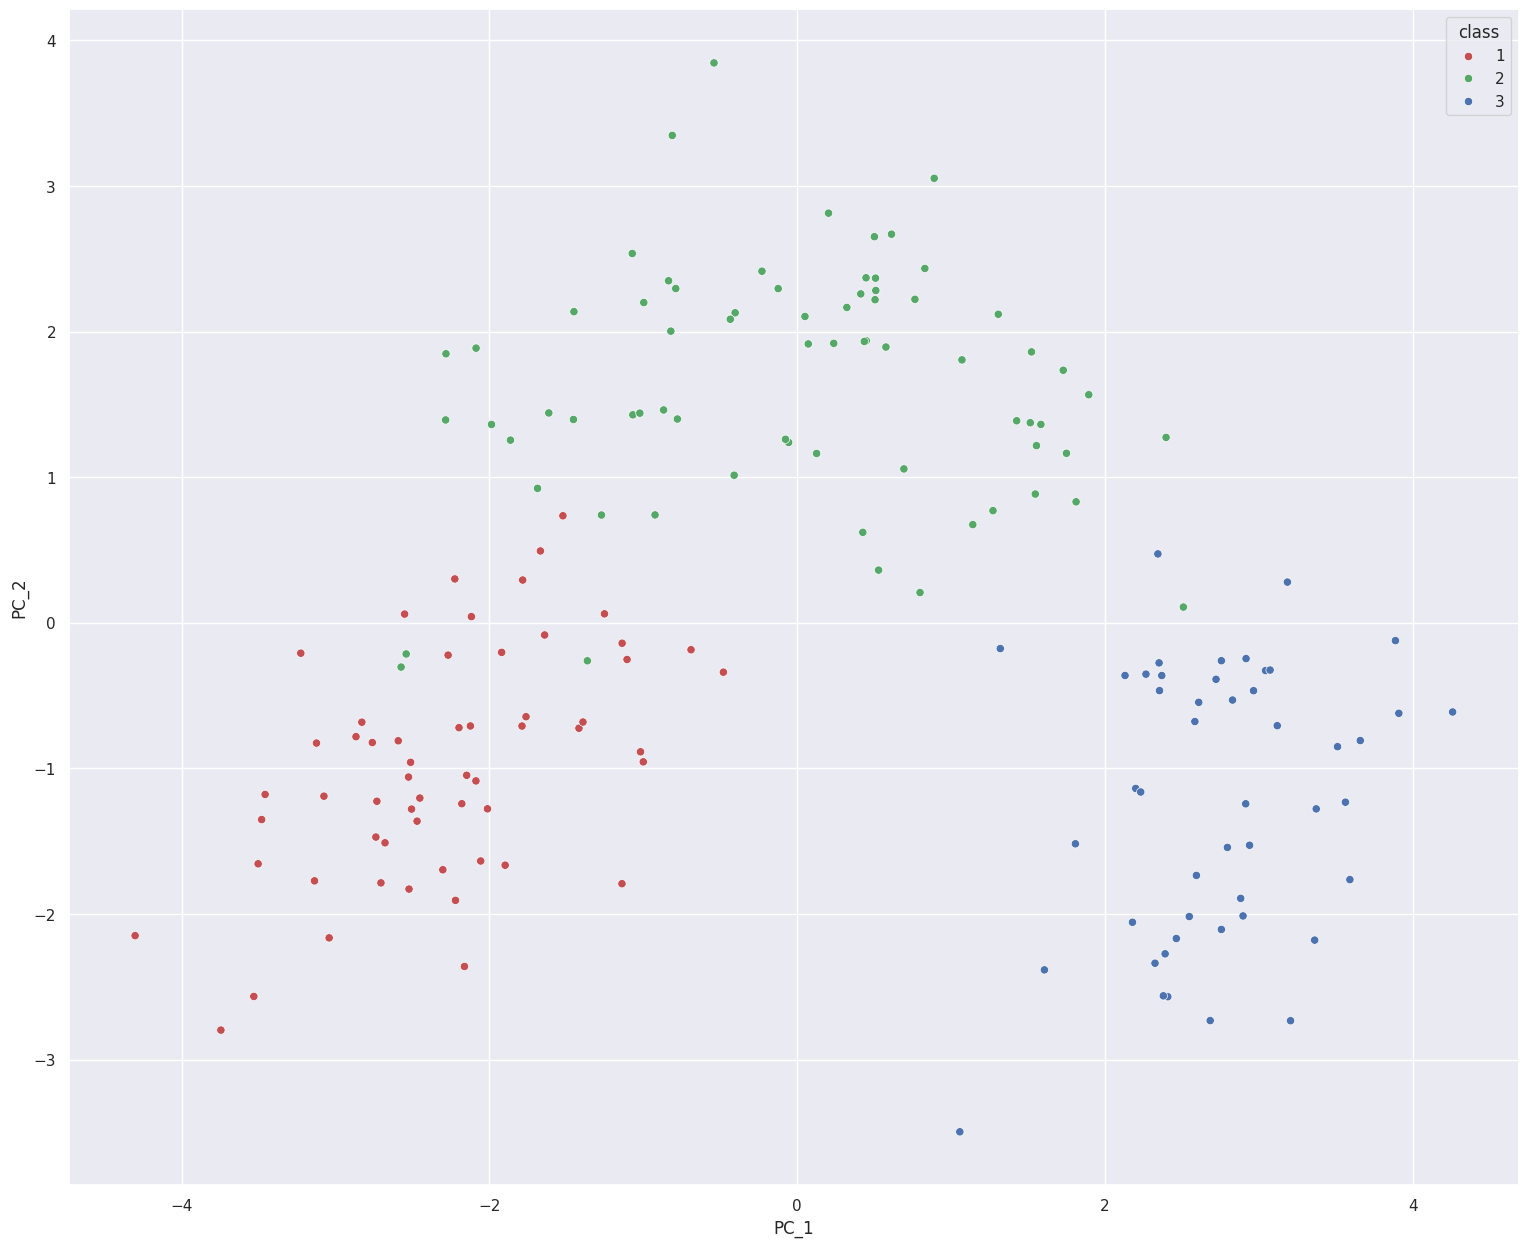

In [127]:
sns.scatterplot(Z_standardized_pca, x='PC_1', y='PC_2', hue='class', palette=['r','g','b'])

<Axes: xlabel='PC_1', ylabel='PC_2'>

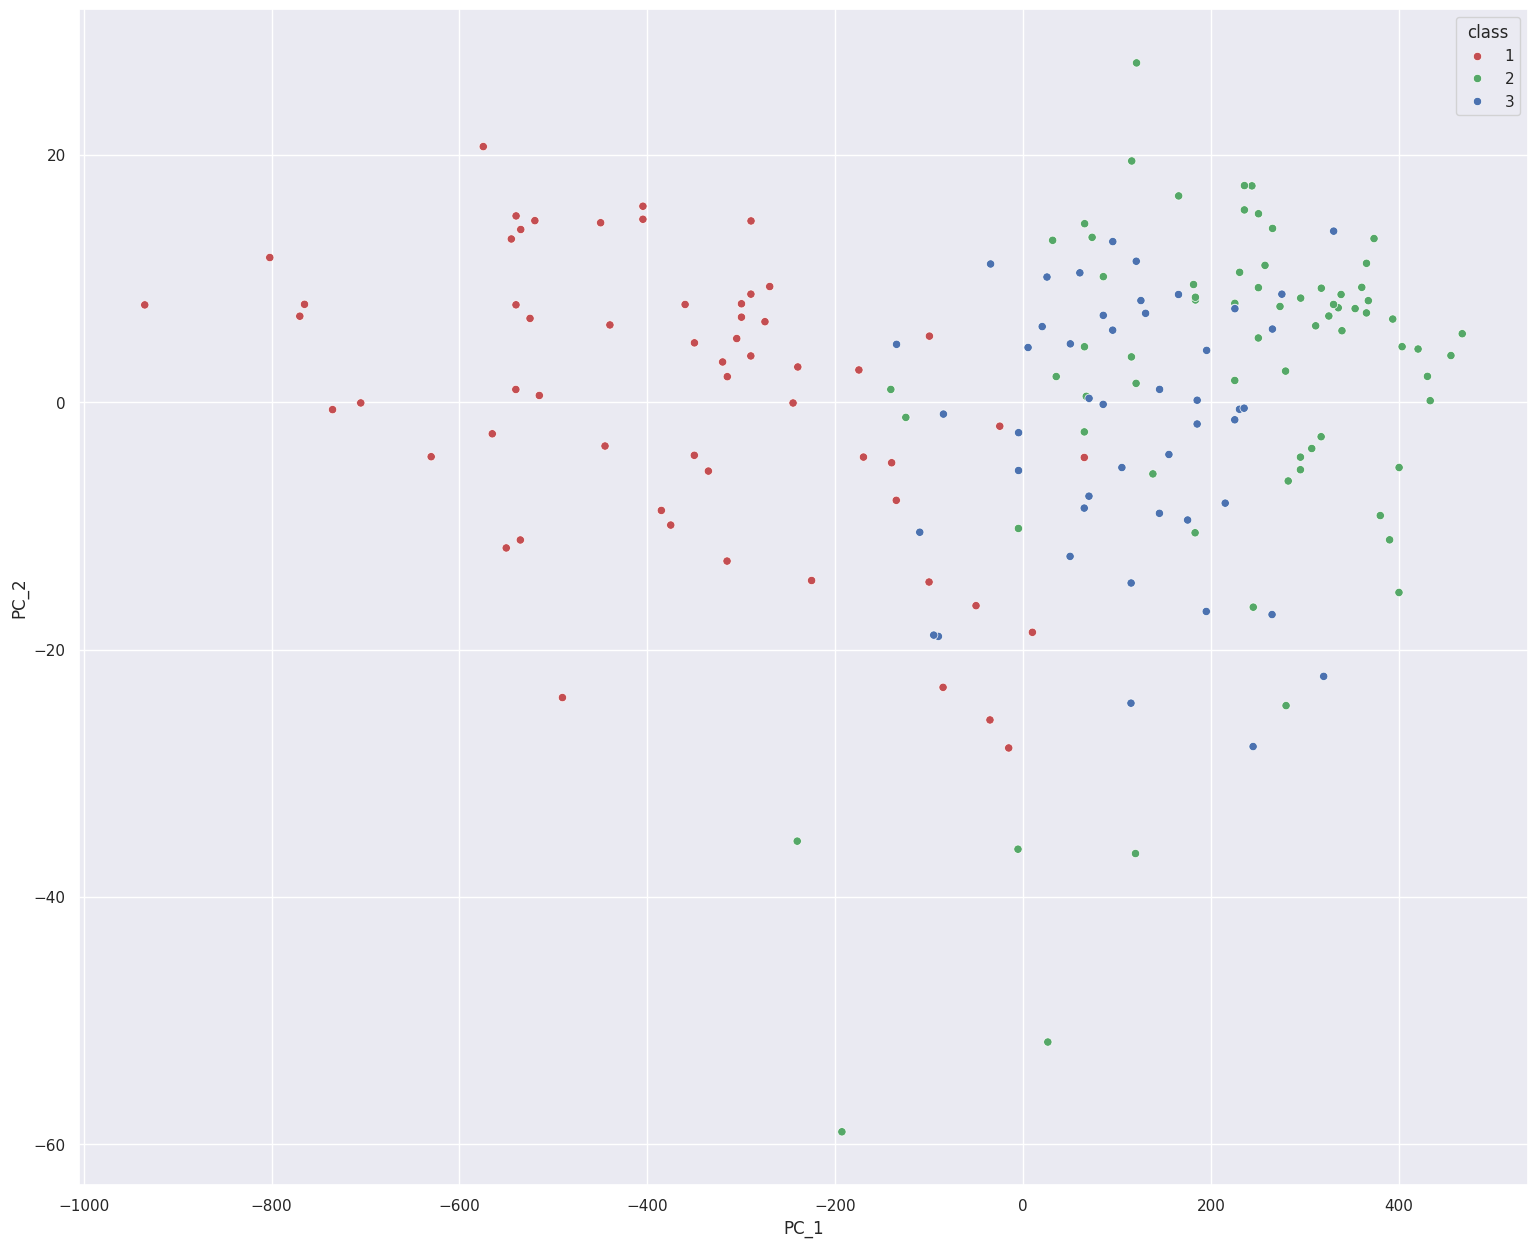

In [128]:
sns.scatterplot(Z_pca, x='PC_1', y='PC_2', hue='class', palette=['r','g','b'])

## Question 6 [5 points]

Python provides convenient libraries to do all of the steps we just above. Lets repeat the analysis using the provided libraries.

1. Using StandardScaler from the sklearn.preprocessing library, transform the 13 predictor variables in your wine dataset so that they have zero mean and unit standard deviation.  
2. Using the PCA library from sklearn.decomposition, perform PCA on the 13 predictor variables in the wine dataset. Report the percent of variance explained by the first 2 prinicipal components

You can look at the code samples [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) to do this


In [132]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [133]:
# define your X variables
X_df = wine.drop('class', axis=1)

In [134]:
# fill code here to standardize the data using StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [135]:
# fill code here to do PCA using the sklearn PCA() function
pca = PCA()
X_scaled_pca_np = pca.fit_transform(X_scaled)

In [137]:
# fill code to find the percent of explained variance by the first two principal
# components. HOw does this compared to your manual analysis
explained_variance = pca.explained_variance_ratio_
explained_variance[:2].sum()

0.5522435026487947

### Obtain the transformed data

Transform your original X_scaled to the prinicipal components. Note that the transform function returns a numpy array. Convert to pandas dataframe. Append the class variable to this dataset and then create a scatterplot of PC1 and PC2, and the 3 wine classes

In [138]:
# fill code here to transform the original data using the principal components
X_scaled_pca = pd.DataFrame(X_scaled_pca_np)

In [139]:
# Naming the columns
X_scaled_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
X_scaled_pca['class'] = wine['class']

[Text(0.5, 1.0, 'PCA Scatterplot'), Text(0.5, 0, 'PC_1'), Text(0, 0.5, 'PC_2')]

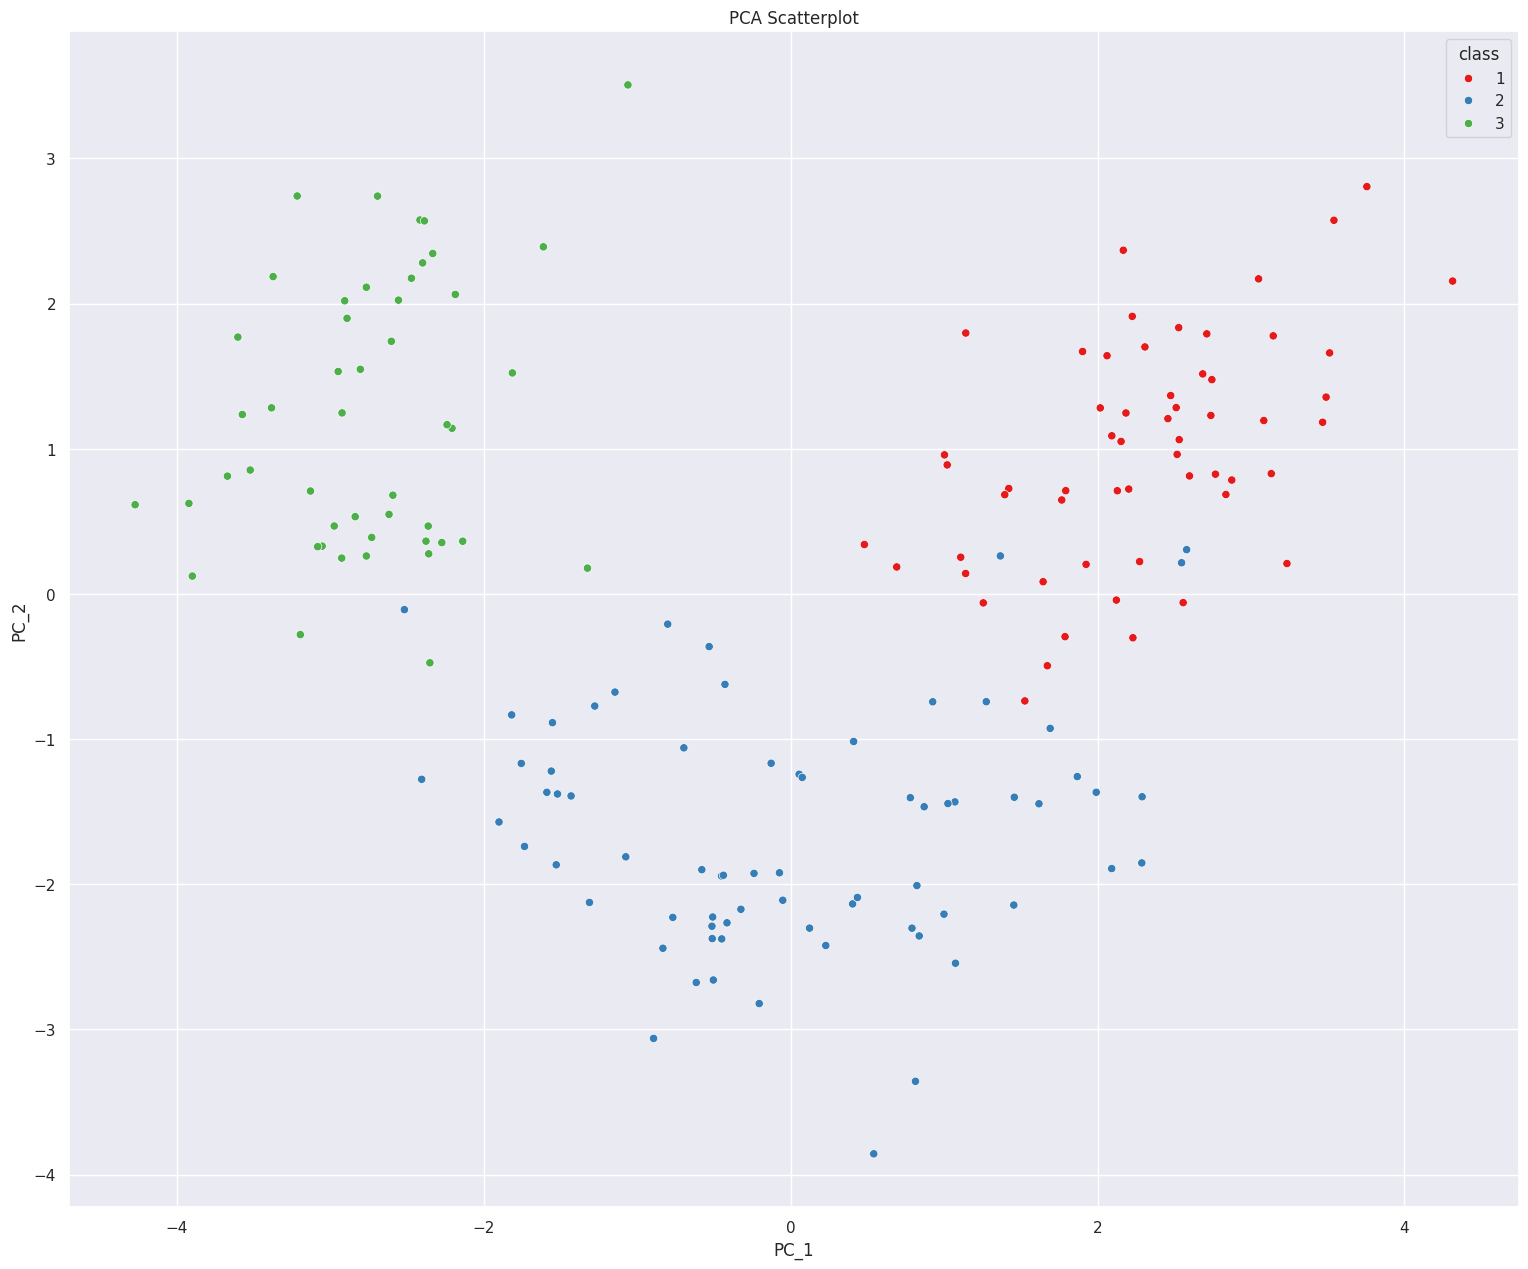

In [142]:
# fill code here to plot PC_1 and PC_2 and see if they can separate the class
sns.scatterplot(data=X_scaled_pca, x='PC_1', y='PC_2', hue='class', palette = 'Set1').set(
    title='PCA Scatterplot',
    xlabel='PC_1',
    ylabel='PC_2'
)

# Sum of EigenValues [5 points]

In the above example, we saw that the sum of eigenvalues is equal to the sum of all variances in the data. Let X be a data matrix. Prove that the sum of the variances of X is equal to the sum of eigenvalues of Cov(X) using matrix properties




**Solution**  


Let $X \in \mathbb{R}^{n \times p}$ be the data matrix with $p$ features and $n$ samples, assuming the data is centered (i.e., the mean of each column is zero).

Covariance matrix, Cov(X)= $\frac{1}{n-1} X^T X$$

The variances of the features are the diagonal entries of Cov(X). So,

Sum of variances = Tr(Cov(X))

Since Cov(X) is symmetric, its eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_p$ are real. The sum of the eigenvalues of a symmetric matrix equals the trace of the matrix:

$
\sum_{i=1}^{p} \lambda_i = \text{Tr(Cov(X))}
$

Therefore,

Sum of variances of X $= \sum_{i=1}^{p} \lambda_i
$

